# Assignment 3: Deep Convolutional Neural Networks and Transformers

# Section 1: Implementation, Analysis, Performance Evaluation and Comparison of Deep Convolutional Neural Networks for Image Classification (70 points)

**Objective:** The objective of this section is to implement a deep convolutional neural network (CNN) for the identification of flower types. The provided dataset consists of five classes of flowers, namely chamomile, tulip, rose, sunflower, and dandelion. 

**Tasks:**
To complete this assignment, please submit a single notebook that includes the implementation and outputs of the following eight steps.
Provide answers for each sub-question by thorough analysis and extensive experimental investigation using the provided dataset. In other words, your answers should be backed by experimental analysis of your models and the dataset. Please ensure that the notebook retain the outputs. Failure to do so will result in zero marks for the corresponding steps in which no output is displayed.

In [110]:
import os
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.layers import GlobalAveragePooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import SGD, Adam
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import SGD, Adam

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
gpus = tf.config.list_physical_devices('GPU')
tf.config.set_visible_devices(gpus[1], 'GPU') 

In [64]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

**1. Prepare and Preprocess the data. (10 points)**

* What is the total number of images in the dataset, and how are they distributed across the five flower types?

* Do we need to implement techniques to balance the distribution of images across various flower types, such as oversampling or undersampling?

* What are the dimensions (height and width) of the images in the dataset, and is there any variation among different flower types?

* What preprocessing techniques should be applied, such as resizing, normalization or standardization and why?

* How would you split the dataset into training, validation and testing sets, and in what ratios?


Answer:
1.	This dataset contains a total of 4317 images, distributed unevenly across five flower classes. Specifically, daisy has 764 images, rose has 784, tulip has 984, dandelion has 1052, and sunflower has 733 images.
2.	If undersampling is applied, it will reduce the overall dataset size and potentially cause the model to lose valuable information, leading to degraded performance. On the other hand, oversampling by duplicating images may result in overfitting, as the model could memorize repeated samples rather than learning generalizable patterns. Therefore, to address class imbalance, I chose to apply data augmentation techniques to generate more diverse images for the underrepresented classes, thus improving generalization without losing data. Moreover, the class imbalance is not particularly severe (the difference between the largest and smallest classes is only 319 images), so proceeding with training after augmentation is a reasonable approach.
3.	I randomly selected three images from each flower type and printed their dimensions using .shape. The results show that image sizes are inconsistent both within and across different flower types. Hence, resizing is necessary to standardize the input dimensions before feeding the images into the CNN model.
4.	To prepare the images properly, I applied resizing to a fixed size of 224×224 pixels to ensure consistent input shapes. Additionally, I normalized the pixel values to the range [0, 1] by applying a Rescaling layer. Normalization helps improve training efficiency, model stability, and convergence speed.
5.	I used the splitfolders library to divide the dataset into training, validation, and testing sets with a ratio of 70:15:15.

In summary, during the data preparation process, I first split the dataset, then applied resizing, data augmentation, and normalization to the training set. For the validation and test sets, I applied resizing and normalization.


回答：
1. 本数据集包含总计4317张图片，分布在五种花卉类别中，类别分布不均。具体地，daisy有764张，rose有784张，tulip有984张，dandelion有1052张，sunflower有733张。
2.	如果使用欠采样（undersampling），会减少数据集规模，可能导致模型丧失有价值的信息，从而影响性能。而如果使用过采样（oversampling）简单复制样本，又容易导致过拟合，因为模型可能记住重复样本而不是学到泛化特征。因此，为了解决类别不平衡问题，我采用了数据增强（data augmentation）的方法，通过生成更加多样化的图像来扩充样本量，从而提升模型的泛化能力。同时，由于最大类别与最小类别之间仅相差319张图片，数据不平衡程度并不严重，因此在应用数据增强后直接训练是合理的选择。
3.	我随机从每个花卉类别中选取了三张图片，使用.shape查看其尺寸。结果表明，各类别内部以及不同类别之间图片尺寸并不统一，因此需要对图片进行统一尺寸调整（resize），以便输入CNN模型时保持一致性。
4.	为了规范化处理图像，我将所有图像resize到固定的224×224像素大小，确保输入尺寸一致。此外，我通过添加Rescaling层将像素值归一化到[0,1]区间。归一化有助于提高训练效率，提升模型稳定性，并加快收敛速度。
5.	我使用splitfolders库将数据集按70:15:15的比例划分为训练集、验证集和测试集。

总结：在数据准备过程中，我首先对数据集进行了划分，然后对训练集应用了resize、数据增强和归一化处理。对于验证集和测试集，我进行了resize和归一化处理。

Total number of images: 4317
Image distribution across classes: {'daisy': 764, 'dandelion': 1052, 'rose': 784, 'sunflower': 733, 'tulip': 984}


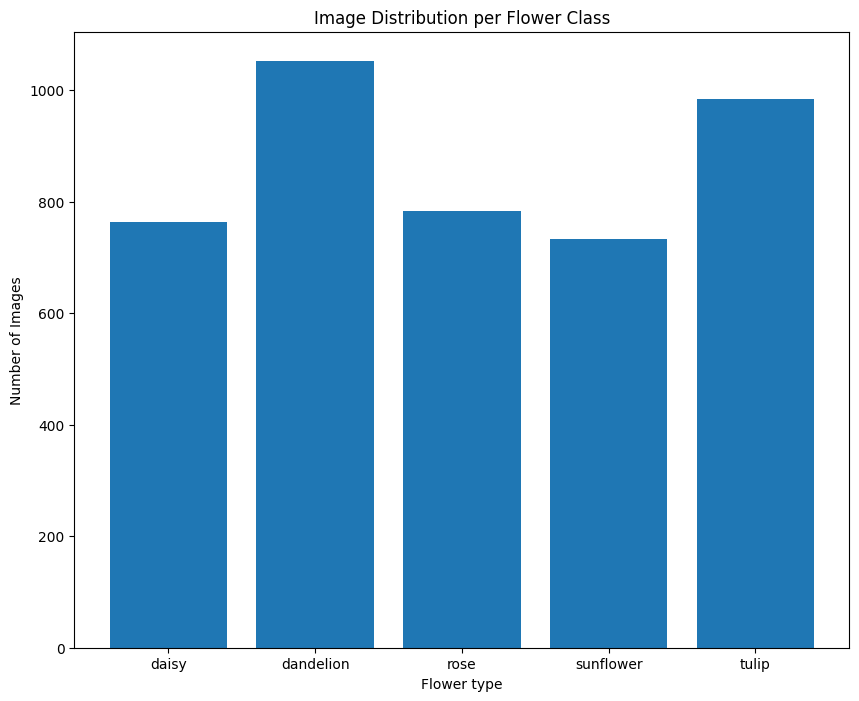

In [65]:
#Step 1 implementation
#Hint: Take the help of split-folder python library

#1.1 the total number of images in the dataset and their distribution
data_dir = "flowers"

count = {}

for flower in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, flower)
    if os.path.isdir(folder_path): 
        count[flower] = len(os.listdir(folder_path))

total_number = sum(count.values())
print("Total number of images:", total_number)
print("Image distribution across classes:", count)


import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.bar(count.keys(), count.values())
plt.xlabel('Flower type')
plt.ylabel('Number of Images')
plt.title('Image Distribution per Flower Class')
plt.show()


In [66]:
#1.3 Dimensions of the images and check the variation among different flower types
import matplotlib.pyplot as plt
img = plt.imread("flowers/daisy/5547758_eea9edfd54_n.jpg")
print(img.shape) 

#checking
for flower_type in os.listdir(data_dir):
    flower_path = os.path.join(data_dir, flower_type)
    if os.path.isdir(flower_path):
        sample_images = random.sample(os.listdir(flower_path), 3)
        print(f"\nFlower type: {flower_type}")
        for img_name in sample_images:
            img_path = os.path.join(flower_path, img_name)
            try:
                img = plt.imread(img_path)
                print(f"{img_name}: shape = {img.shape}")
            except:
                print(f"Failed to load image: {img_name}")


(232, 320, 3)

Flower type: daisy
6864242336_0d12713fe5_n.jpg: shape = (240, 320, 3)
15029936576_8d6f96c72c_n.jpg: shape = (240, 320, 3)
10994032453_ac7f8d9e2e.jpg: shape = (333, 500, 3)

Flower type: dandelion
34679936936_9924d79c8d_n.jpg: shape = (180, 240, 3)
34339792440_8224ca420d_n.jpg: shape = (179, 240, 3)
33875742534_31b85d1b05_n.jpg: shape = (148, 240, 3)

Flower type: rose
16374919860_4e445de29f_n.jpg: shape = (240, 320, 3)
8987479080_32ab912d10_n.jpg: shape = (213, 320, 3)
15674450867_0ced942941_n.jpg: shape = (240, 320, 3)

Flower type: sunflower
9431896325_23bf6e8761.jpg: shape = (332, 500, 3)
6061175433_95fdb12f32_n.jpg: shape = (213, 320, 3)
15054752730_fcf54d475e_m.jpg: shape = (240, 240, 3)

Flower type: tulip
444963906_e41492b692.jpg: shape = (382, 500, 3)
20152653918_009a39f323_n.jpg: shape = (134, 240, 3)
12163418275_bd6a1edd61.jpg: shape = (333, 500, 3)


In [67]:
#1.5 How would you split the dataset into training, validation and testing sets, and in what ratios?
splitfolders.ratio(data_dir, output="flowers_split",seed=42, ratio=(0.7, 0.15, 0.15))

Copying files: 4317 files [00:16, 259.04 files/s]


In [68]:
import tensorflow as tf

#Paths and batch size
train_dir = 'flowers_split/train'
val_dir = 'flowers_split/val'
test_dir = 'flowers_split/test'
batch_size = 64

#Define normalization layer
normalization_layer = tf.keras.layers.Rescaling(1./255)

#Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=False
)

#Data augmentation function
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.8, upper=1.2)
    image = tf.image.random_saturation(image, lower=0.8, upper=1.2)
    image = tf.image.random_hue(image, max_delta=0.1)
    return image, label

#Apply augmentation and normalization
#Only resizing and normalization applied to validation and test sets
train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)

#Prefetch
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Found 654 files belonging to 5 classes.


**2. Design a CNN architecture with its input is image size of $224 \times 224 \times 3$ and the output is the class. Draw the diagram of your CNN architecture (An example diagram is given blow) and save it as "studentCNN.png".(5 points)**
  
* Design and Explain why you think this architecture is suitable for this image classification task.
  
<img src='CNN.png' alt='given CNN'>

> **Step 2** Design and draw CNN
> 
> **hint** Consider the computational cost of training your CNN
>
> <img src='cnn_model.png' alt='student CNN'>

Answer:

The goal of this image classification task is to recognize five types of flower images. The dataset contains a total of 4,317 images, making it a small-to-medium-sized dataset. Therefore, it is not suitable to use a very deep or parameter-heavy neural network.

When designing the model, I considered the following aspects:
1.	Risk of overfitting: On small datasets, using a complex network architecture may lead to overfitting. Thus, I designed a relatively shallow and compact CNN.
2.	Effective feature extraction: Although the model is simplified, I still aim to effectively extract features such as edges, textures, and shapes. Therefore, I adopted and adjusted the convolutional structure inspired by VGG16.

Specifically, I made the following simplifications and optimizations based on the design philosophy of VGG16:
1.	A MaxPooling layer is added after every two convolutional layers to reduce spatial dimensions, decrease the number of parameters, and enhance the model’s translation invariance.
2.	All convolution kernels are set to a size of 3×3 with a stride of 1 to maintain strong local feature extraction capabilities.
3.	The number of channels gradually increases through the network: 32 → 64 → 128.
4.	Instead of using a Flatten layer, I adopted a Global Average Pooling layer. After comparison, I found that using Global Average Pooling (total params: 156,581; memory: 611.64 KB) significantly reduces the number of parameters compared to using Flatten (total params: 10,380,197; memory: 39.60 MB). When the convolutional layers are relatively shallow, directly applying Flatten would cause an explosion of parameters, which can severely impact training efficiency. Thus, I used Global Average Pooling, followed by a fully connected layer with 128 neurons, and finally a Softmax output layer for classification.
5.	The total number of parameters in the model is only 156,581 (approximately 611.64 KB), allowing for faster training and providing more flexibility for experimenting with different hyperparameter combinations in the later stages.

In summary, this network design achieves a good balance between efficient feature extraction, model simplicity, and training speed, making it well-suited for this flower classification task.

本次图像分类任务的目标是识别五种花卉图像。数据集总共包含4317张图片，属于中小型规模的数据集，因此不适合使用非常深或参数量极大的神经网络。

在设计模型时，我主要考虑了以下几个方面：
1.	过拟合风险：在小型数据集上，使用复杂的网络架构容易导致过拟合。因此，我设计了一个相对浅层且紧凑的卷积神经网络（CNN）。
2.	有效的特征提取能力：尽管模型进行了简化，我仍希望它能够有效地提取边缘、纹理和形状等关键特征。因此，我参考并调整了VGG16的卷积结构设计思路。

具体来说，我基于VGG16的设计理念进行了如下简化与优化：
1.	每两个卷积层后添加一个最大池化（MaxPooling）层，用于降低空间维度、减少参数数量，并增强模型的平移不变性。
2.	所有卷积核统一采用3×3大小，步长为1，以保持强大的局部特征提取能力。
3.	通道数逐步增加：32 → 64 → 128。
4.	我使用了Global Average Pooling层代替传统的Flatten层。通过对比，我发现使用Global Average Pooling（总参数量：156,581；内存占用：611.64 KB）相比于直接使用Flatten（总参数量：10,380,197；内存占用：39.60 MB），能显著减少参数量。当卷积层较少时，直接使用Flatten会导致参数量急剧增加，严重影响训练效率。因此，我选择了Global Average Pooling，并在其后接一个128个神经元的全连接层，最后使用Softmax进行分类。
5.	整个模型的总参数量仅为156,581个（约611.64 KB），训练速度快，同时为后续调整不同超参数组合提供了更大的灵活性空间。

总的来说，该网络设计在特征提取能力、模型简洁性和训练效率之间取得了良好的平衡，适合本次花卉分类任务的需求。

**3. Implement your CNN (5 points)**

In [82]:
#Step 3 implementation


cnn = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    # Flatten(),
    GlobalAveragePooling2D(),
    
    Dense(128,activation='relu'),
    Dense(5,activation='softmax')

])

In [83]:
cnn.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_315 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 conv2d_316 (Conv2D)         (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_189 (MaxPool  (None, 110, 110, 32)      0         
 ing2D)                                                          
                                                                 
 conv2d_317 (Conv2D)         (None, 108, 108, 64)      18496     
                                                                 
 conv2d_318 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_190 (MaxPool  (None, 53, 53, 64)        0         
 ing2D)                                              

**4. Train the model. (10 Points)** 

Note: In Colab, change runtime type to T4 GPU (via Connect==>change runtime type) to ensure the running time won't be too long.

* What is your approach for selecting the appropriate hyperparameters for the model training, such as the learning rate, number of epochs, batch size, and optimizer?

* What methods do you use for monitoring the training progress and performance of the model and why?

* What metrics would you prefer to measure the performance, such as accuracy, precision, recall, F1 score, or ROC-AUC and why?

Answer:

1. Hyperparameter Selection
To select appropriate hyperparameters, I conducted a systematic grid search across the following combinations:
batch_sizes = [8, 16, 32, 64], learning_rates = [1e-2, 1e-3, 1e-4], and optimizers = [SGD, Adam], resulting in a total of 24 configurations.
I trained the model for each combination and recorded the best validation accuracy. The experimental results show that the combination of batch size 16, learning rate 0.001, and optimizer Adam achieved the highest validation accuracy (78.10%).

Throughout the experiments, I observed that batch size, learning rate, and optimizer had significant effects on the training dynamics and final performance:
* A moderate batch size (16 or 32) led to a more stable training process and higher validation accuracy.
* A reasonable learning rate (0.001) promoted stable convergence, avoiding oscillations or excessively slow training.
* The Adam optimizer demonstrated better robustness and faster convergence, and overall outperformed SGD on this relatively small dataset.

2. I monitored the training process using the loss and accuracy on the validation set. This allowed me to promptly identify signs of overfitting or underfitting and adjust the training strategy if necessary.

3. Evaluation metric: I preferred using accuracy as the main evaluation metric because the class distribution in the dataset is relatively balanced, making accuracy a valid and reliable measure of overall model performance. Additionally, accuracy is one of the most intuitive and easy-to-understand metrics, which makes it especially useful for monitoring model performance during both training and validation.

In [ ]:
# 4.1 Tuning hyperparameters

# Store the best validation accuracy and full validation accuracy histories
results = []
val_acc_history_dict = {}

# Hyperparameter search space
batch_sizes = [8,16, 32, 64]
learning_rates = [1e-2, 1e-3, 1e-4]
optimizers = [SGD, Adam]

total_runs = len(batch_sizes) * len(learning_rates) * len(optimizers)
pbar = tqdm(total=total_runs, ncols=100, desc='Hyperparameter Search')

# Important: In TensorFlow, the batch size is fixed when loading the dataset.
# Therefore, when testing different batch sizes, I must recreate a new dataset each time.


# Start grid search
for bs in batch_sizes:
    for lr in learning_rates:
        for optm in optimizers:
            desc = f"BS={bs}, LR={lr}, OPT={optm.__name__}"
            pbar.set_description(f"Training {desc}")
            print(f"\n\n>>> Training with BS={bs}, LR={lr}, OPT={optm.__name__}\n") 
    

            # Reload train and validation datasets with current batch size
            train_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'flowers_split/train',
                image_size=(224, 224),
                batch_size=bs,
                shuffle=True
            )
            train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
            train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
            train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

            val_ds = tf.keras.preprocessing.image_dataset_from_directory(
                'flowers_split/val',
                image_size=(224, 224),
                batch_size=bs,
                shuffle=False
            )
            val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
            val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

            # Define CNN model (new instance for each run)
            cnn = Sequential([
                Input(shape=(224, 224, 3)),
                Conv2D(32, (3,3), activation='relu'),
                Conv2D(32, (3,3), activation='relu'),
                MaxPooling2D(2,2),

                Conv2D(64, (3,3), activation='relu'),
                Conv2D(64, (3,3), activation='relu'),
                MaxPooling2D(2,2),

                Conv2D(128, (3,3), activation='relu'),
                MaxPooling2D(2,2),

                GlobalAveragePooling2D(),
                Dense(128, activation='relu'),
                Dense(5, activation='softmax')
            ])

            # Set optimizer
            optimizer = optm(learning_rate=lr, momentum=0.9) if optm == SGD else optm(learning_rate=lr)

            # Compile model
            cnn.compile(
                loss='sparse_categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy']
            )

            # Train model
            history = cnn.fit(
                train_ds,
                validation_data=val_ds,
                epochs=50,
                verbose=1
            )

            # Save validation accuracy history
            key = f"BS={bs}_LR={lr}_OPT={optm.__name__}"
            val_acc_history_dict[key] = history.history['val_accuracy']

            # Save best validation accuracy
            best_val_acc = max(history.history['val_accuracy'])
            results.append({
                'batch_size': bs,
                'learning_rate': lr,
                'optimizer': optm.__name__,
                'best_val_acc': best_val_acc 
            })

            # Update progress bar
            pbar.set_postfix({'Best_Val_Acc': f"{best_val_acc:.4f}"})
            pbar.update(1)

pbar.close()

# Sort and print final results
results = sorted(results, key=lambda x: x['best_val_acc'], reverse=True)
print(results)

Training BS=4, LR=0.001, OPT=Adam:   0%|                                      | 0/1 [00:24<?, ?it/s]




>>> Training with BS=8, LR=0.01, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
378/378 [==============================] - 5s 10ms/step - loss: 1.6061 - accuracy: 0.2425 - val_loss: 1.5969 - val_accuracy: 0.2438
Epoch 2/50
378/378 [==============================] - 4s 9ms/step - loss: 1.5723 - accuracy: 0.2633 - val_loss: 1.6505 - val_accuracy: 0.2919
Epoch 3/50
378/378 [==============================] - 4s 10ms/step - loss: 1.6016 - accuracy: 0.2378 - val_loss: 1.5563 - val_accuracy: 0.3245
Epoch 4/50
378/378 [==============================] - 3s 9ms/step - loss: 1.5800 - accuracy: 0.2766 - val_loss: 1.5734 - val_accuracy: 0.2888
Epoch 5/50
378/378 [==============================] - 4s 9ms/step - loss: 1.5039 - accuracy: 0.3418 - val_loss: 1.4888 - val_accuracy: 0.3230
Epoch 6/50
378/378 [==============================] - 4s 9ms/step - loss: 1.5133 - accuracy: 0.3286 - val_loss: 1.5226 - val_accuracy: 0.2935
Epoch 7/50
378/378 [=



>>> Training with BS=8, LR=0.01, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
378/378 [==============================] - 6s 10ms/step - loss: 1.6185 - accuracy: 0.2378 - val_loss: 1.5999 - val_accuracy: 0.2438
Epoch 2/50
378/378 [==============================] - 4s 9ms/step - loss: 1.6006 - accuracy: 0.2315 - val_loss: 1.5998 - val_accuracy: 0.2438
Epoch 3/50
378/378 [==============================] - 4s 9ms/step - loss: 1.6006 - accuracy: 0.2355 - val_loss: 1.5995 - val_accuracy: 0.2438
Epoch 4/50
378/378 [==============================] - 4s 10ms/step - loss: 1.6001 - accuracy: 0.2329 - val_loss: 1.5996 - val_accuracy: 0.2438
Epoch 5/50
378/378 [==============================] - 4s 10ms/step - loss: 1.6008 - accuracy: 0.2345 - val_loss: 1.5997 - val_accuracy: 0.2438
Epoch 6/50
378/378 [==============================] - 4s 9ms/step - loss: 1.6004 - accuracy: 0.2329 - val_loss: 1.5998 - val_accuracy: 0.2438
Epoch 7/50
378/378 



>>> Training with BS=8, LR=0.001, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
378/378 [==============================] - 5s 9ms/step - loss: 1.5981 - accuracy: 0.2594 - val_loss: 1.5926 - val_accuracy: 0.2345
Epoch 2/50
378/378 [==============================] - 4s 9ms/step - loss: 1.5816 - accuracy: 0.2885 - val_loss: 1.5740 - val_accuracy: 0.2562
Epoch 3/50
378/378 [==============================] - 3s 9ms/step - loss: 1.5154 - accuracy: 0.3296 - val_loss: 1.5260 - val_accuracy: 0.3121
Epoch 4/50
378/378 [==============================] - 3s 9ms/step - loss: 1.4676 - accuracy: 0.3587 - val_loss: 1.3624 - val_accuracy: 0.4286
Epoch 5/50
378/378 [==============================] - 3s 9ms/step - loss: 1.4167 - accuracy: 0.3773 - val_loss: 1.2815 - val_accuracy: 0.4425
Epoch 6/50
378/378 [==============================] - 3s 9ms/step - loss: 1.3882 - accuracy: 0.3912 - val_loss: 1.2591 - val_accuracy: 0.4550
Epoch 7/50
378/378 [==



>>> Training with BS=8, LR=0.001, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
378/378 [==============================] - 6s 10ms/step - loss: 1.6028 - accuracy: 0.2385 - val_loss: 1.6008 - val_accuracy: 0.2438
Epoch 2/50
378/378 [==============================] - 4s 9ms/step - loss: 1.6004 - accuracy: 0.2435 - val_loss: 1.6006 - val_accuracy: 0.2283
Epoch 3/50
378/378 [==============================] - 4s 10ms/step - loss: 1.6001 - accuracy: 0.2398 - val_loss: 1.6000 - val_accuracy: 0.2283
Epoch 4/50
378/378 [==============================] - 4s 9ms/step - loss: 1.5998 - accuracy: 0.2398 - val_loss: 1.5997 - val_accuracy: 0.2438
Epoch 5/50
378/378 [==============================] - 4s 9ms/step - loss: 1.5997 - accuracy: 0.2438 - val_loss: 1.5994 - val_accuracy: 0.2438
Epoch 6/50
378/378 [==============================] - 4s 10ms/step - loss: 1.5998 - accuracy: 0.2438 - val_loss: 1.5995 - val_accuracy: 0.2438
Epoch 7/50
378/378



>>> Training with BS=8, LR=0.0001, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
378/378 [==============================] - 5s 9ms/step - loss: 1.6085 - accuracy: 0.2352 - val_loss: 1.6053 - val_accuracy: 0.2531
Epoch 2/50
378/378 [==============================] - 4s 9ms/step - loss: 1.6035 - accuracy: 0.2935 - val_loss: 1.6015 - val_accuracy: 0.3059
Epoch 3/50
378/378 [==============================] - 4s 10ms/step - loss: 1.6006 - accuracy: 0.3094 - val_loss: 1.5988 - val_accuracy: 0.3012
Epoch 4/50
378/378 [==============================] - 4s 9ms/step - loss: 1.5983 - accuracy: 0.3034 - val_loss: 1.5968 - val_accuracy: 0.2966
Epoch 5/50
378/378 [==============================] - 4s 10ms/step - loss: 1.5967 - accuracy: 0.2991 - val_loss: 1.5951 - val_accuracy: 0.2997
Epoch 6/50
378/378 [==============================] - 4s 9ms/step - loss: 1.5950 - accuracy: 0.2994 - val_loss: 1.5935 - val_accuracy: 0.2981
Epoch 7/50
378/378 



>>> Training with BS=8, LR=0.0001, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
378/378 [==============================] - 6s 10ms/step - loss: 1.5405 - accuracy: 0.3114 - val_loss: 1.3645 - val_accuracy: 0.3913
Epoch 2/50
378/378 [==============================] - 4s 10ms/step - loss: 1.4018 - accuracy: 0.3892 - val_loss: 1.2558 - val_accuracy: 0.4565
Epoch 3/50
378/378 [==============================] - 4s 10ms/step - loss: 1.3626 - accuracy: 0.4164 - val_loss: 1.2362 - val_accuracy: 0.4798
Epoch 4/50
378/378 [==============================] - 4s 10ms/step - loss: 1.3293 - accuracy: 0.4333 - val_loss: 1.2194 - val_accuracy: 0.4752
Epoch 5/50
378/378 [==============================] - 4s 9ms/step - loss: 1.3031 - accuracy: 0.4492 - val_loss: 1.1793 - val_accuracy: 0.5000
Epoch 6/50
378/378 [==============================] - 4s 10ms/step - loss: 1.3082 - accuracy: 0.4452 - val_loss: 1.1721 - val_accuracy: 0.5202
Epoch 7/50
378/



>>> Training with BS=16, LR=0.01, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
189/189 [==============================] - 4s 15ms/step - loss: 1.5722 - accuracy: 0.2948 - val_loss: 1.4911 - val_accuracy: 0.3199
Epoch 2/50
189/189 [==============================] - 3s 14ms/step - loss: 1.5470 - accuracy: 0.3150 - val_loss: 1.4733 - val_accuracy: 0.3882
Epoch 3/50
189/189 [==============================] - 3s 15ms/step - loss: 1.4725 - accuracy: 0.3584 - val_loss: 1.2902 - val_accuracy: 0.4410
Epoch 4/50
189/189 [==============================] - 3s 15ms/step - loss: 1.4615 - accuracy: 0.3673 - val_loss: 1.3324 - val_accuracy: 0.4472
Epoch 5/50
189/189 [==============================] - 3s 16ms/step - loss: 1.3768 - accuracy: 0.4087 - val_loss: 1.2275 - val_accuracy: 0.4814
Epoch 6/50
189/189 [==============================] - 3s 15ms/step - loss: 1.3415 - accuracy: 0.4326 - val_loss: 1.1978 - val_accuracy: 0.4860
Epoch 7/50
189/1



>>> Training with BS=16, LR=0.01, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
189/189 [==============================] - 5s 14ms/step - loss: 1.6046 - accuracy: 0.2411 - val_loss: 1.5997 - val_accuracy: 0.2438
Epoch 2/50
189/189 [==============================] - 3s 14ms/step - loss: 1.6007 - accuracy: 0.2392 - val_loss: 1.5992 - val_accuracy: 0.2438
Epoch 3/50
189/189 [==============================] - 3s 16ms/step - loss: 1.6002 - accuracy: 0.2372 - val_loss: 1.5992 - val_accuracy: 0.2438
Epoch 4/50
189/189 [==============================] - 3s 16ms/step - loss: 1.6004 - accuracy: 0.2438 - val_loss: 1.5986 - val_accuracy: 0.2438
Epoch 5/50
189/189 [==============================] - 3s 15ms/step - loss: 1.6006 - accuracy: 0.2375 - val_loss: 1.5991 - val_accuracy: 0.2438
Epoch 6/50
189/189 [==============================] - 3s 15ms/step - loss: 1.6001 - accuracy: 0.2382 - val_loss: 1.5990 - val_accuracy: 0.2438
Epoch 7/50
189/



>>> Training with BS=16, LR=0.001, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
189/189 [==============================] - 4s 15ms/step - loss: 1.6046 - accuracy: 0.2322 - val_loss: 1.5986 - val_accuracy: 0.2438
Epoch 2/50
189/189 [==============================] - 3s 15ms/step - loss: 1.5970 - accuracy: 0.2531 - val_loss: 1.5933 - val_accuracy: 0.2500
Epoch 3/50
189/189 [==============================] - 3s 15ms/step - loss: 1.5915 - accuracy: 0.2736 - val_loss: 1.5844 - val_accuracy: 0.2888
Epoch 4/50
189/189 [==============================] - 3s 15ms/step - loss: 1.5813 - accuracy: 0.3177 - val_loss: 1.5620 - val_accuracy: 0.3540
Epoch 5/50
189/189 [==============================] - 3s 15ms/step - loss: 1.5452 - accuracy: 0.3362 - val_loss: 1.4776 - val_accuracy: 0.3991
Epoch 6/50
189/189 [==============================] - 3s 16ms/step - loss: 1.4850 - accuracy: 0.3359 - val_loss: 1.3804 - val_accuracy: 0.4379
Epoch 7/50
189/



>>> Training with BS=16, LR=0.001, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
189/189 [==============================] - 5s 15ms/step - loss: 1.5544 - accuracy: 0.2971 - val_loss: 1.4379 - val_accuracy: 0.3525
Epoch 2/50
189/189 [==============================] - 3s 15ms/step - loss: 1.4551 - accuracy: 0.3654 - val_loss: 1.3150 - val_accuracy: 0.4565
Epoch 3/50
189/189 [==============================] - 3s 16ms/step - loss: 1.3693 - accuracy: 0.4140 - val_loss: 1.2357 - val_accuracy: 0.4720
Epoch 4/50
189/189 [==============================] - 3s 15ms/step - loss: 1.3371 - accuracy: 0.4399 - val_loss: 1.1877 - val_accuracy: 0.4907
Epoch 5/50
189/189 [==============================] - 3s 15ms/step - loss: 1.2912 - accuracy: 0.4568 - val_loss: 1.1162 - val_accuracy: 0.5248
Epoch 6/50
189/189 [==============================] - 3s 16ms/step - loss: 1.2444 - accuracy: 0.4945 - val_loss: 1.1148 - val_accuracy: 0.5357
Epoch 7/50
189



>>> Training with BS=16, LR=0.0001, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
189/189 [==============================] - 4s 15ms/step - loss: 1.6072 - accuracy: 0.2431 - val_loss: 1.6052 - val_accuracy: 0.2438
Epoch 2/50
189/189 [==============================] - 3s 15ms/step - loss: 1.6042 - accuracy: 0.2438 - val_loss: 1.6026 - val_accuracy: 0.2438
Epoch 3/50
189/189 [==============================] - 3s 16ms/step - loss: 1.6022 - accuracy: 0.2438 - val_loss: 1.6006 - val_accuracy: 0.2438
Epoch 4/50
189/189 [==============================] - 3s 16ms/step - loss: 1.6003 - accuracy: 0.2438 - val_loss: 1.5989 - val_accuracy: 0.2438
Epoch 5/50
189/189 [==============================] - 3s 15ms/step - loss: 1.5986 - accuracy: 0.2438 - val_loss: 1.5973 - val_accuracy: 0.2438
Epoch 6/50
189/189 [==============================] - 3s 15ms/step - loss: 1.5974 - accuracy: 0.2438 - val_loss: 1.5959 - val_accuracy: 0.2438
Epoch 7/50
189



>>> Training with BS=16, LR=0.0001, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
189/189 [==============================] - 5s 16ms/step - loss: 1.5699 - accuracy: 0.2862 - val_loss: 1.4909 - val_accuracy: 0.3540
Epoch 2/50
189/189 [==============================] - 3s 16ms/step - loss: 1.4498 - accuracy: 0.3604 - val_loss: 1.3365 - val_accuracy: 0.4177
Epoch 3/50
189/189 [==============================] - 3s 17ms/step - loss: 1.3960 - accuracy: 0.3776 - val_loss: 1.2834 - val_accuracy: 0.4301
Epoch 4/50
189/189 [==============================] - 3s 16ms/step - loss: 1.3771 - accuracy: 0.4008 - val_loss: 1.2668 - val_accuracy: 0.4658
Epoch 5/50
189/189 [==============================] - 3s 15ms/step - loss: 1.3466 - accuracy: 0.4286 - val_loss: 1.2467 - val_accuracy: 0.4891
Epoch 6/50
189/189 [==============================] - 3s 16ms/step - loss: 1.3354 - accuracy: 0.4362 - val_loss: 1.2609 - val_accuracy: 0.4907
Epoch 7/50
18



>>> Training with BS=32, LR=0.01, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
95/95 [==============================] - 4s 25ms/step - loss: 1.5886 - accuracy: 0.2541 - val_loss: 1.5726 - val_accuracy: 0.3168
Epoch 2/50
95/95 [==============================] - 3s 27ms/step - loss: 1.5135 - accuracy: 0.3200 - val_loss: 1.3736 - val_accuracy: 0.4068
Epoch 3/50
95/95 [==============================] - 3s 27ms/step - loss: 1.4859 - accuracy: 0.3524 - val_loss: 1.3982 - val_accuracy: 0.3835
Epoch 4/50
95/95 [==============================] - 3s 27ms/step - loss: 1.4308 - accuracy: 0.3760 - val_loss: 1.2742 - val_accuracy: 0.4286
Epoch 5/50
95/95 [==============================] - 3s 26ms/step - loss: 1.3902 - accuracy: 0.4041 - val_loss: 1.2714 - val_accuracy: 0.4705
Epoch 6/50
95/95 [==============================] - 3s 26ms/step - loss: 1.3423 - accuracy: 0.4246 - val_loss: 1.2216 - val_accuracy: 0.4798
Epoch 7/50
95/95 [==========



>>> Training with BS=32, LR=0.01, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
95/95 [==============================] - 5s 25ms/step - loss: 1.6237 - accuracy: 0.2395 - val_loss: 1.5989 - val_accuracy: 0.2438
Epoch 2/50
95/95 [==============================] - 3s 25ms/step - loss: 1.6012 - accuracy: 0.2468 - val_loss: 1.6020 - val_accuracy: 0.2438
Epoch 3/50
95/95 [==============================] - 3s 25ms/step - loss: 1.6009 - accuracy: 0.2312 - val_loss: 1.5999 - val_accuracy: 0.2438
Epoch 4/50
95/95 [==============================] - 3s 27ms/step - loss: 1.6010 - accuracy: 0.2385 - val_loss: 1.5991 - val_accuracy: 0.2438
Epoch 5/50
95/95 [==============================] - 3s 26ms/step - loss: 1.6005 - accuracy: 0.2438 - val_loss: 1.5992 - val_accuracy: 0.2438
Epoch 6/50
95/95 [==============================] - 3s 26ms/step - loss: 1.6002 - accuracy: 0.2355 - val_loss: 1.5987 - val_accuracy: 0.2438
Epoch 7/50
95/95 [=========



>>> Training with BS=32, LR=0.001, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
95/95 [==============================] - 4s 25ms/step - loss: 1.6059 - accuracy: 0.2325 - val_loss: 1.6021 - val_accuracy: 0.2438
Epoch 2/50
95/95 [==============================] - 3s 26ms/step - loss: 1.6005 - accuracy: 0.2448 - val_loss: 1.5986 - val_accuracy: 0.2438
Epoch 3/50
95/95 [==============================] - 3s 25ms/step - loss: 1.5976 - accuracy: 0.2441 - val_loss: 1.5960 - val_accuracy: 0.2469
Epoch 4/50
95/95 [==============================] - 3s 26ms/step - loss: 1.5948 - accuracy: 0.2454 - val_loss: 1.5931 - val_accuracy: 0.2609
Epoch 5/50
95/95 [==============================] - 3s 25ms/step - loss: 1.5918 - accuracy: 0.2736 - val_loss: 1.5889 - val_accuracy: 0.3075
Epoch 6/50
95/95 [==============================] - 3s 26ms/step - loss: 1.5868 - accuracy: 0.3074 - val_loss: 1.5819 - val_accuracy: 0.3385
Epoch 7/50
95/95 [=========



>>> Training with BS=32, LR=0.001, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
95/95 [==============================] - 5s 31ms/step - loss: 1.5258 - accuracy: 0.3090 - val_loss: 1.4852 - val_accuracy: 0.3152
Epoch 2/50
95/95 [==============================] - 3s 29ms/step - loss: 1.4134 - accuracy: 0.3948 - val_loss: 1.3240 - val_accuracy: 0.4022
Epoch 3/50
95/95 [==============================] - 3s 29ms/step - loss: 1.3739 - accuracy: 0.4044 - val_loss: 1.2586 - val_accuracy: 0.4332
Epoch 4/50
95/95 [==============================] - 3s 29ms/step - loss: 1.3441 - accuracy: 0.4203 - val_loss: 1.3142 - val_accuracy: 0.4161
Epoch 5/50
95/95 [==============================] - 3s 30ms/step - loss: 1.3091 - accuracy: 0.4442 - val_loss: 1.1879 - val_accuracy: 0.4969
Epoch 6/50
95/95 [==============================] - 3s 28ms/step - loss: 1.2842 - accuracy: 0.4753 - val_loss: 1.1518 - val_accuracy: 0.5575
Epoch 7/50
95/95 [========



>>> Training with BS=32, LR=0.0001, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
95/95 [==============================] - 4s 26ms/step - loss: 1.6072 - accuracy: 0.2279 - val_loss: 1.6067 - val_accuracy: 0.2283
Epoch 2/50
95/95 [==============================] - 3s 28ms/step - loss: 1.6055 - accuracy: 0.2282 - val_loss: 1.6052 - val_accuracy: 0.2283
Epoch 3/50
95/95 [==============================] - 3s 26ms/step - loss: 1.6043 - accuracy: 0.2292 - val_loss: 1.6041 - val_accuracy: 0.2283
Epoch 4/50
95/95 [==============================] - 3s 27ms/step - loss: 1.6033 - accuracy: 0.2322 - val_loss: 1.6033 - val_accuracy: 0.2314
Epoch 5/50
95/95 [==============================] - 3s 28ms/step - loss: 1.6029 - accuracy: 0.2375 - val_loss: 1.6026 - val_accuracy: 0.2329
Epoch 6/50
95/95 [==============================] - 3s 29ms/step - loss: 1.6019 - accuracy: 0.2451 - val_loss: 1.6020 - val_accuracy: 0.2329
Epoch 7/50
95/95 [========



>>> Training with BS=32, LR=0.0001, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
95/95 [==============================] - 5s 29ms/step - loss: 1.5927 - accuracy: 0.2365 - val_loss: 1.5461 - val_accuracy: 0.2811
Epoch 2/50
95/95 [==============================] - 3s 31ms/step - loss: 1.4877 - accuracy: 0.3398 - val_loss: 1.3707 - val_accuracy: 0.3882
Epoch 3/50
95/95 [==============================] - 3s 29ms/step - loss: 1.4197 - accuracy: 0.3693 - val_loss: 1.3309 - val_accuracy: 0.3929
Epoch 4/50
95/95 [==============================] - 3s 28ms/step - loss: 1.3954 - accuracy: 0.3869 - val_loss: 1.3129 - val_accuracy: 0.4084
Epoch 5/50
95/95 [==============================] - 3s 30ms/step - loss: 1.3902 - accuracy: 0.3836 - val_loss: 1.2794 - val_accuracy: 0.4224
Epoch 6/50
95/95 [==============================] - 3s 29ms/step - loss: 1.3598 - accuracy: 0.4213 - val_loss: 1.2723 - val_accuracy: 0.4286
Epoch 7/50
95/95 [=======



>>> Training with BS=64, LR=0.01, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
48/48 [==============================] - 7s 89ms/step - loss: 1.6010 - accuracy: 0.2418 - val_loss: 1.5939 - val_accuracy: 0.2531
Epoch 2/50
48/48 [==============================] - 4s 59ms/step - loss: 1.5919 - accuracy: 0.2739 - val_loss: 1.5799 - val_accuracy: 0.2516
Epoch 3/50
48/48 [==============================] - 3s 56ms/step - loss: 1.5491 - accuracy: 0.3183 - val_loss: 1.5123 - val_accuracy: 0.3121
Epoch 4/50
48/48 [==============================] - 3s 52ms/step - loss: 1.4968 - accuracy: 0.3230 - val_loss: 1.4516 - val_accuracy: 0.3432
Epoch 5/50
48/48 [==============================] - 3s 54ms/step - loss: 1.4575 - accuracy: 0.3428 - val_loss: 1.5027 - val_accuracy: 0.3773
Epoch 6/50
48/48 [==============================] - 3s 52ms/step - loss: 1.4410 - accuracy: 0.3594 - val_loss: 1.4556 - val_accuracy: 0.3168
Epoch 7/50
48/48 [==========



>>> Training with BS=64, LR=0.01, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
48/48 [==============================] - 6s 57ms/step - loss: 1.6717 - accuracy: 0.2378 - val_loss: 1.5993 - val_accuracy: 0.2438
Epoch 2/50
48/48 [==============================] - 3s 59ms/step - loss: 1.6007 - accuracy: 0.2438 - val_loss: 1.5986 - val_accuracy: 0.2438
Epoch 3/50
48/48 [==============================] - 3s 61ms/step - loss: 1.6004 - accuracy: 0.2362 - val_loss: 1.5986 - val_accuracy: 0.2438
Epoch 4/50
48/48 [==============================] - 3s 56ms/step - loss: 1.5997 - accuracy: 0.2438 - val_loss: 1.5991 - val_accuracy: 0.2438
Epoch 5/50
48/48 [==============================] - 3s 56ms/step - loss: 1.6005 - accuracy: 0.2305 - val_loss: 1.5983 - val_accuracy: 0.2438
Epoch 6/50
48/48 [==============================] - 3s 62ms/step - loss: 1.5999 - accuracy: 0.2438 - val_loss: 1.5985 - val_accuracy: 0.2438
Epoch 7/50
48/48 [=========



>>> Training with BS=64, LR=0.001, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
48/48 [==============================] - 4s 46ms/step - loss: 1.6051 - accuracy: 0.2382 - val_loss: 1.6022 - val_accuracy: 0.2407
Epoch 2/50
48/48 [==============================] - 3s 56ms/step - loss: 1.6006 - accuracy: 0.2726 - val_loss: 1.5990 - val_accuracy: 0.3711
Epoch 3/50
48/48 [==============================] - 3s 58ms/step - loss: 1.5977 - accuracy: 0.3253 - val_loss: 1.5967 - val_accuracy: 0.3416
Epoch 4/50
48/48 [==============================] - 3s 55ms/step - loss: 1.5955 - accuracy: 0.3226 - val_loss: 1.5949 - val_accuracy: 0.3245
Epoch 5/50
48/48 [==============================] - 3s 57ms/step - loss: 1.5942 - accuracy: 0.2968 - val_loss: 1.5929 - val_accuracy: 0.2919
Epoch 6/50
48/48 [==============================] - 3s 60ms/step - loss: 1.5918 - accuracy: 0.3233 - val_loss: 1.5907 - val_accuracy: 0.3168
Epoch 7/50
48/48 [=========



>>> Training with BS=64, LR=0.001, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
48/48 [==============================] - 5s 45ms/step - loss: 1.5626 - accuracy: 0.2958 - val_loss: 1.4155 - val_accuracy: 0.3742
Epoch 2/50
48/48 [==============================] - 3s 53ms/step - loss: 1.4324 - accuracy: 0.3574 - val_loss: 1.3621 - val_accuracy: 0.4193
Epoch 3/50
48/48 [==============================] - 3s 52ms/step - loss: 1.3941 - accuracy: 0.3875 - val_loss: 1.3113 - val_accuracy: 0.4503
Epoch 4/50
48/48 [==============================] - 3s 51ms/step - loss: 1.3532 - accuracy: 0.4253 - val_loss: 1.3381 - val_accuracy: 0.4037
Epoch 5/50
48/48 [==============================] - 3s 51ms/step - loss: 1.3210 - accuracy: 0.4511 - val_loss: 1.3725 - val_accuracy: 0.3960
Epoch 6/50
48/48 [==============================] - 3s 50ms/step - loss: 1.3016 - accuracy: 0.4465 - val_loss: 1.2719 - val_accuracy: 0.4596
Epoch 7/50
48/48 [========



>>> Training with BS=64, LR=0.0001, OPT=SGD

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
48/48 [==============================] - 4s 43ms/step - loss: 1.6105 - accuracy: 0.1656 - val_loss: 1.6102 - val_accuracy: 0.1444
Epoch 2/50
48/48 [==============================] - 3s 52ms/step - loss: 1.6098 - accuracy: 0.2027 - val_loss: 1.6094 - val_accuracy: 0.2329
Epoch 3/50
48/48 [==============================] - 3s 55ms/step - loss: 1.6088 - accuracy: 0.2286 - val_loss: 1.6086 - val_accuracy: 0.2283
Epoch 4/50
48/48 [==============================] - 3s 54ms/step - loss: 1.6080 - accuracy: 0.2276 - val_loss: 1.6079 - val_accuracy: 0.2283
Epoch 5/50
48/48 [==============================] - 3s 54ms/step - loss: 1.6072 - accuracy: 0.2282 - val_loss: 1.6072 - val_accuracy: 0.2283
Epoch 6/50
48/48 [==============================] - 3s 54ms/step - loss: 1.6067 - accuracy: 0.2286 - val_loss: 1.6066 - val_accuracy: 0.2283
Epoch 7/50
48/48 [========



>>> Training with BS=64, LR=0.0001, OPT=Adam

Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
48/48 [==============================] - 5s 47ms/step - loss: 1.5949 - accuracy: 0.2842 - val_loss: 1.5778 - val_accuracy: 0.2345
Epoch 2/50
48/48 [==============================] - 3s 52ms/step - loss: 1.5419 - accuracy: 0.3041 - val_loss: 1.4790 - val_accuracy: 0.2981
Epoch 3/50
48/48 [==============================] - 3s 53ms/step - loss: 1.4568 - accuracy: 0.3614 - val_loss: 1.3833 - val_accuracy: 0.4099
Epoch 4/50
48/48 [==============================] - 3s 54ms/step - loss: 1.4071 - accuracy: 0.3793 - val_loss: 1.3284 - val_accuracy: 0.4193
Epoch 5/50
48/48 [==============================] - 3s 59ms/step - loss: 1.3954 - accuracy: 0.3799 - val_loss: 1.3449 - val_accuracy: 0.3991
Epoch 6/50
48/48 [==============================] - 3s 52ms/step - loss: 1.3689 - accuracy: 0.4015 - val_loss: 1.3101 - val_accuracy: 0.4146
Epoch 7/50
48/48 [=======

Training BS=64, LR=0.0001, OPT=Adam: 100%|██| 24/24 [1:07:05<00:00, 167.75s/it, Best_Val_Acc=0.5668]

[{'batch_size': 16, 'learning_rate': 0.001, 'optimizer': 'Adam', 'best_val_acc': 0.7810559272766113}, {'batch_size': 32, 'learning_rate': 0.001, 'optimizer': 'Adam', 'best_val_acc': 0.7779502868652344}, {'batch_size': 64, 'learning_rate': 0.001, 'optimizer': 'Adam', 'best_val_acc': 0.7142857313156128}, {'batch_size': 8, 'learning_rate': 0.01, 'optimizer': 'SGD', 'best_val_acc': 0.7127329111099243}, {'batch_size': 16, 'learning_rate': 0.01, 'optimizer': 'SGD', 'best_val_acc': 0.695652186870575}, {'batch_size': 32, 'learning_rate': 0.01, 'optimizer': 'SGD', 'best_val_acc': 0.6677018404006958}, {'batch_size': 8, 'learning_rate': 0.0001, 'optimizer': 'Adam', 'best_val_acc': 0.6661490797996521}, {'batch_size': 16, 'learning_rate': 0.0001, 'optimizer': 'Adam', 'best_val_acc': 0.6335403919219971}, {'batch_size': 8, 'learning_rate': 0.001, 'optimizer': 'SGD', 'best_val_acc': 0.6257764101028442}, {'batch_size': 32, 'learning_rate': 0.0001, 'optimizer': 'Adam', 'best_val_acc': 0.6024844646453857

In [101]:
#Final results
import pandas as pd

df = pd.DataFrame(results)
df_sorted = df.sort_values(by='best_val_acc',ascending=False)
print(df_sorted)

    batch_size  learning_rate optimizer  best_val_acc
0           16         0.0010      Adam      0.781056
1           32         0.0010      Adam      0.777950
2           64         0.0010      Adam      0.714286
3            8         0.0100       SGD      0.712733
4           16         0.0100       SGD      0.695652
5           32         0.0100       SGD      0.667702
6            8         0.0001      Adam      0.666149
7           16         0.0001      Adam      0.633540
8            8         0.0010       SGD      0.625776
9           32         0.0001      Adam      0.602484
10          64         0.0100       SGD      0.585404
11          16         0.0010       SGD      0.580745
12          64         0.0001      Adam      0.566770
13          32         0.0010       SGD      0.531056
14          64         0.0010       SGD      0.512422
15           8         0.0001       SGD      0.501553
16          16         0.0001       SGD      0.444099
17          32         0.000

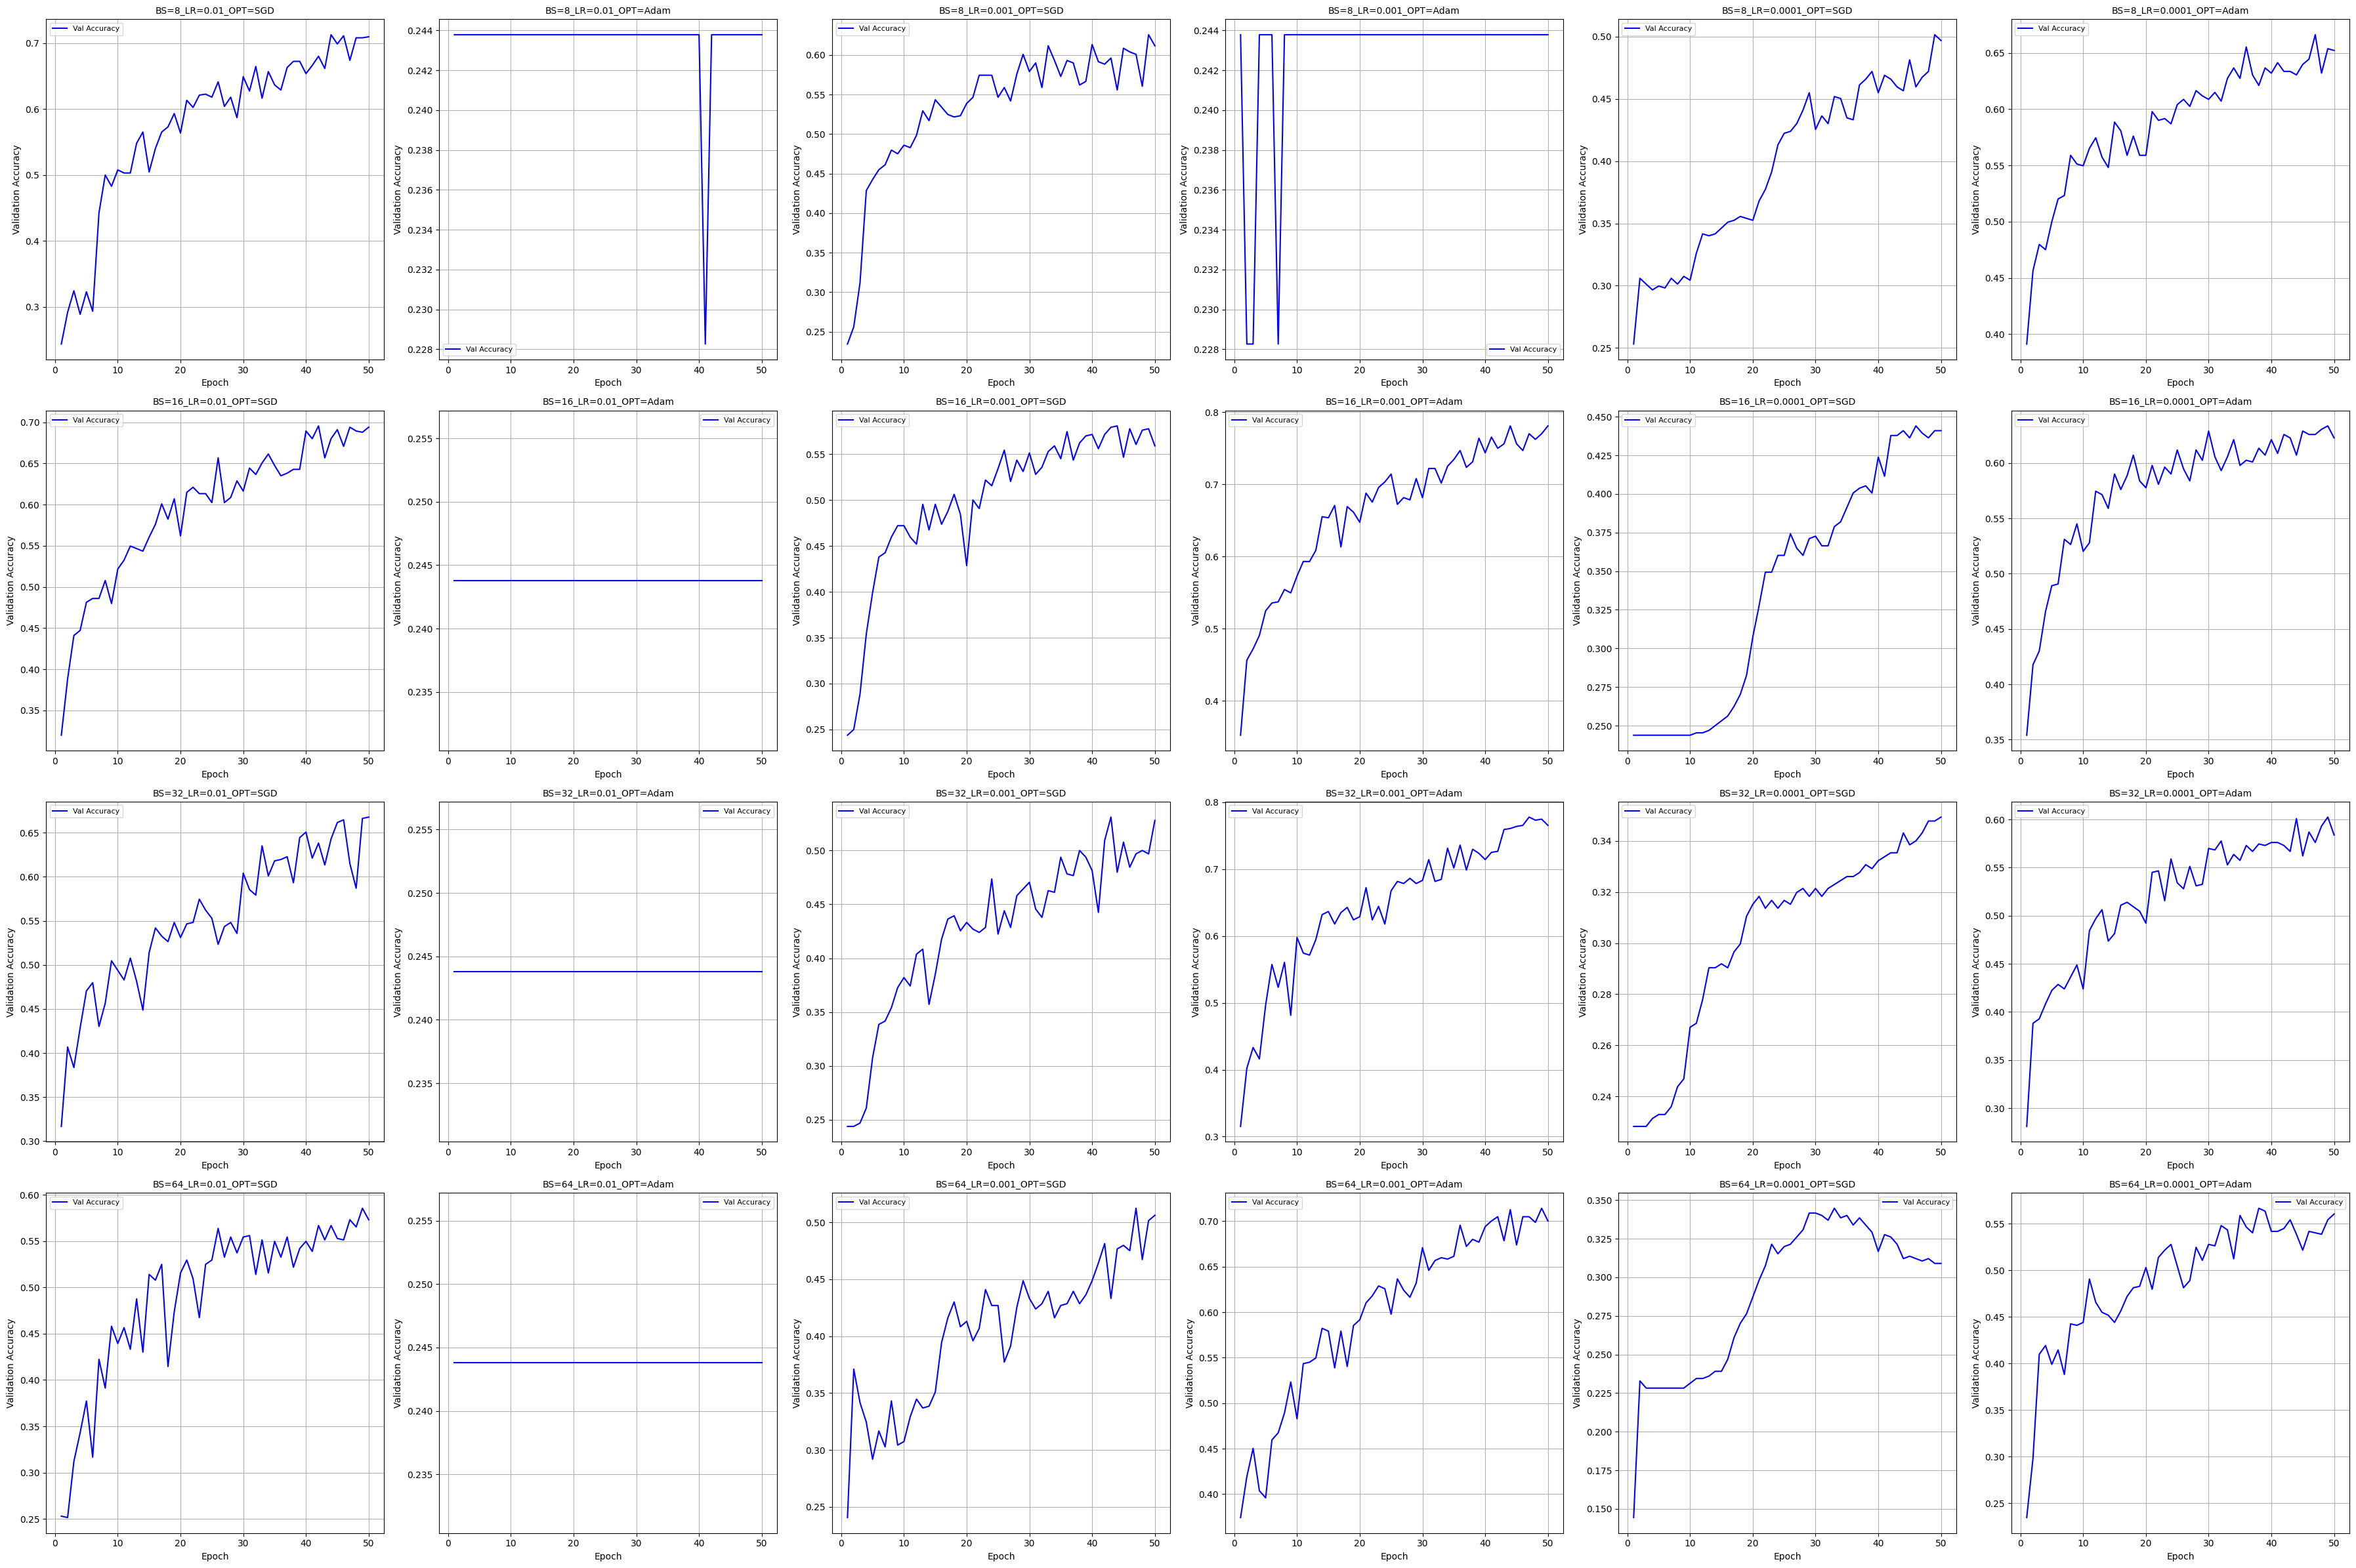

In [98]:
import matplotlib.pyplot as plt

#Plot settings
fig, axes = plt.subplots(4, 6, figsize=(36, 24))  
axes = axes.flatten()  

for idx, (key, val_accuracy_list) in enumerate(val_acc_history_dict.items()): 
    ax = axes[idx]
    epochs = range(1, len(val_accuracy_list) + 1) 

    ax.plot(epochs, val_accuracy_list, label='Val Accuracy', color='blue')

    ax.set_title(key, fontsize=10)
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Validation Accuracy')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()

In [167]:
#Final model training with best hyperparameters

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np


#Define the selected hyperparameters based on the previous tuning
batch_size = 16
learning_rates = 1e-3
optimizers = Adam
epochs = 50


#Load and preprocess the training set
train_ds = image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=True
)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.map(augment, num_parallel_calls=tf.data.AUTOTUNE)
train_ds_final = train_ds.prefetch(tf.data.AUTOTUNE)

#Load and preprocess the validation set
val_ds = image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),
    batch_size=batch_size,
    shuffle=False
)
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y), num_parallel_calls=tf.data.AUTOTUNE)
val_ds_final = val_ds.prefetch(tf.data.AUTOTUNE)

#CNN model
cnn = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])


cnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'])

#Train the model
history = cnn.fit(
    train_ds,
    validation_data=val_ds_final,
    epochs=50,
    verbose=1
)


Found 3019 files belonging to 5 classes.
Found 644 files belonging to 5 classes.
Epoch 1/50
189/189 [==============================] - 5s 15ms/step - loss: 1.5571 - accuracy: 0.2925 - val_loss: 1.3862 - val_accuracy: 0.3804
Epoch 2/50
189/189 [==============================] - 3s 15ms/step - loss: 1.4507 - accuracy: 0.3693 - val_loss: 1.2625 - val_accuracy: 0.4643
Epoch 3/50
189/189 [==============================] - 3s 15ms/step - loss: 1.3718 - accuracy: 0.4134 - val_loss: 1.2435 - val_accuracy: 0.4658
Epoch 4/50
189/189 [==============================] - 3s 15ms/step - loss: 1.3194 - accuracy: 0.4402 - val_loss: 1.2250 - val_accuracy: 0.4969
Epoch 5/50
189/189 [==============================] - 3s 15ms/step - loss: 1.2729 - accuracy: 0.4694 - val_loss: 1.1237 - val_accuracy: 0.5466
Epoch 6/50
189/189 [==============================] - 3s 16ms/step - loss: 1.2366 - accuracy: 0.4995 - val_loss: 1.0218 - val_accuracy: 0.6040
Epoch 7/50
189/189 [==============================] - 3s 16ms

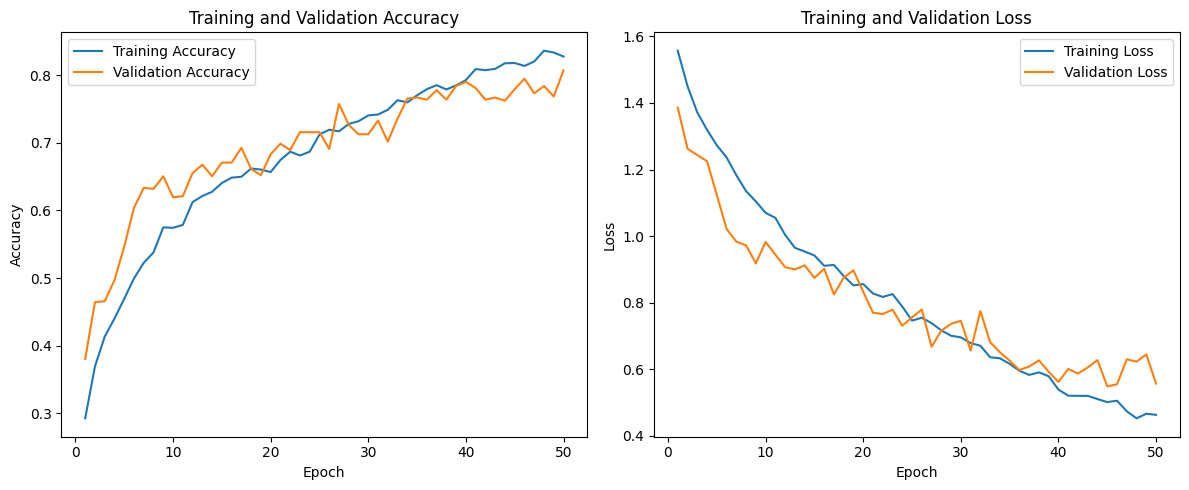

In [168]:
import matplotlib.pyplot as plt

def plot_training_history(history, epochs):
    # Extract metrics
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Plotting
    epochs_range = range(1, epochs + 1)
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, train_acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, train_loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
plot_training_history(history, epochs=50)

**5. Report the results. (10 points)**

* What is the final accuracy of the model on the validation set, and how does it compare to the training accuracy?

* What is the confusion matrix for the model on the validation set, and which flower types are the most difficult to classify?

* How does the model perform on individual flower types, and are there any particular images that the model struggles to classify?

* What is the rough model complexity?

* Is the model's large size contributing to any challenges or constraints in its performance on the given dataset.


Answer:
1.	The final training accuracy is 82.51%, while the final validation accuracy is 77.33%. The model shows a slight overfitting: the training accuracy is higher than the validation accuracy by about 5%, but the gap is within an acceptable range.
2. The confusion matrix indicates that roses are the most difficult to classify correctly. Roses are often misclassified as tulips and daisies.
In contrast, dandelions and sunflowers are classified more accurately.
	
3.	How does the model perform on individual flower types, and are there any particular images that the model struggles to classify?
* Dandelions achieved the highest precision (85%) but relatively lower recall (74%), suggesting that while most predicted dandelions are correct, some real dandelions are misclassified.
* Sunflowers have very high recall (92%) but relatively lower precision (67%), meaning the model tends to predict sunflower even when it is not always correct.
* Roses show the lowest overall performance, with both precision and recall around 70%, indicating that roses are frequently confused with other classes, especially tulips.
* Tulips and daisies have reasonably balanced performance.

4. The model has approximately 156,581 parameters (about 612 KB), which is a relatively small model compared to modern CNNs.

5.	Is the model’s large size contributing to any challenges or constraints in its performance on the given dataset? No, the model size is appropriate for this task. The dataset is relatively small, and the model’s size (612 KB) does not cause any significant constraints in terms of computation or memory usage. However, slight overfitting suggests that further regularization (e.g., dropout) could help improve generalization.


最终模型评估：
1.	模型在验证集上的最终准确率是多少？与训练准确率相比如何？
最终训练集准确率为 82.51%，验证集准确率为 77.33%。
模型存在轻微的过拟合现象：训练准确率比验证准确率高约5%，但整体差距在可以接受的范围内。
2.	验证集上的混淆矩阵如何？哪些花的分类最困难？
混淆矩阵显示，**玫瑰（rose）**是最难分类的类别，经常被错误分类为郁金香（tulip）或雏菊（daisy）。
相比之下，蒲公英（dandelion）和向日葵（sunflower）分类表现更好。
3.	模型在每种花上的表现如何？有哪些特定图像模型容易出错？

* 蒲公英拥有最高的准确率（precision 85%），但召回率（recall）稍低（74%），说明大部分预测为蒲公英的图片是正确的，但有一部分真正的蒲公英被误分类了。
* 向日葵的召回率非常高（92%），但准确率（precision）相对较低（67%），表明模型倾向于预测为向日葵，即使有时预测错误。
* 玫瑰的整体表现最差，准确率和召回率都只有大约**70%**左右，说明玫瑰容易被混淆为其他类别，尤其是郁金香。
* 郁金香（tulip）和雏菊（daisy）的表现则相对均衡。

4.	模型的大致复杂度是多少？
模型大约有 156,581 个参数（约 612 KB），属于小型卷积神经网络（CNN）。
5.	模型的体积是否对本任务的性能造成了挑战或限制？
没有，模型大小与数据集规模匹配。
由于数据集本身不大，模型（612 KB）不会引发计算或内存上的瓶颈。
不过，轻微的过拟合现象提示，如果进一步加入正则化（比如Dropout或者更丰富的数据增强），可能可以进一步提升模型的泛化能力。


In [169]:
# Evaluate on training set
train_loss, train_accuracy = cnn.evaluate(train_ds_final, verbose=0)

# Evaluate on validation set
val_loss, val_accuracy = cnn.evaluate(val_ds_final, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

Training Accuracy: 0.8377
Validation Accuracy: 0.8075


41/41 [==============================] - 0s 6ms/step


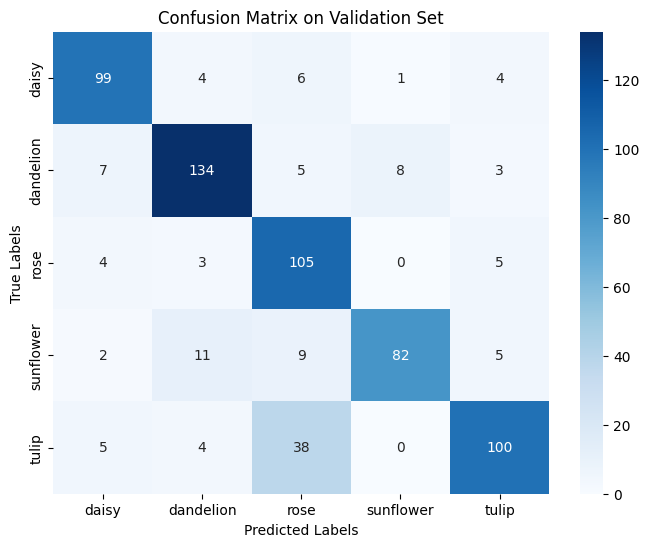

              precision    recall  f1-score   support

       daisy       0.85      0.87      0.86       114
   dandelion       0.86      0.85      0.86       157
        rose       0.64      0.90      0.75       117
   sunflower       0.90      0.75      0.82       109
       tulip       0.85      0.68      0.76       147

    accuracy                           0.81       644
   macro avg       0.82      0.81      0.81       644
weighted avg       0.82      0.81      0.81       644



In [170]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model_on_validation(model, val_ds):
    # Predict on validation set
    val_preds = model.predict(val_ds)
    val_pred_labels = np.argmax(val_preds, axis=1)

    # Extract true labels manually
    val_true_labels = []
    for images, labels in val_ds.unbatch():
        val_true_labels.append(labels.numpy())
    val_true_labels = np.array(val_true_labels)

    # Manually define class names
    class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

    # Confusion matrix
    cm = confusion_matrix(val_true_labels, val_pred_labels)

    # Plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix on Validation Set')
    plt.show()

    # Classification report
    report = classification_report(val_true_labels, val_pred_labels, target_names=class_names)
    print(report)

# Run it
evaluate_model_on_validation(cnn, val_ds_final)

In [171]:
#Check the numbers of parameter
total_params = cnn.count_params()
print(f"Total number of parameters: {total_params}")

cnn.summary()

Total number of parameters: 156581
Model: "sequential_120"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_600 (Conv2D)         (None, 222, 222, 32)      896       
                                                                 
 conv2d_601 (Conv2D)         (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_360 (MaxPool  (None, 110, 110, 32)      0         
 ing2D)                                                          
                                                                 
 conv2d_602 (Conv2D)         (None, 108, 108, 64)      18496     
                                                                 
 conv2d_603 (Conv2D)         (None, 106, 106, 64)      36928     
                                                                 
 max_pooling2d_361 (MaxPool  (None, 53, 53, 64)        0         
 ing2D)          

In [172]:
# Evaluate on the test set
test_loss, test_accuracy = cnn.evaluate(test_ds, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.8211


**6. Test the model by giving it a picture taken by your own phone camera. (10 points)**

* How can the accuracy of the model on the picture taken by your own phone camera be evaluated?

* What can be done if the model does not perform well on the picture taken by your own phone camera?


回答：
1.	如何评估模型在手机拍摄图片上的准确率？
可以通过比较模型预测结果与图片中实际花卉类别是否一致，来评估模型在手机拍摄图片上的表现。
在本次实验中，模型成功预测为 rose，且置信度非常高（rose: 0.89），表明分类结果准确。
2.	如果模型在手机拍摄图片上表现不好，可以采取哪些改进措施？
如果模型在真实照片上表现不佳，说明它对光照、背景、角度等实际环境变化较为敏感。可以考虑以下改进方法：

* 提升图像质量：在拍摄时保持光线充足、图像清晰、背景简洁，减少干扰因素；
* 收集更多真实图像进行微调：将手机拍摄的花卉图片加入训练集，对模型进行微调，以增强其在真实环境中的鲁棒性；
* 使用迁移学习：采用更适合自然图像场景的预训练模型（如 MobileNetV2、EfficientNet），并在花卉数据集上进一步训练，以提升实际应用中的模型表现。

Answer:
1.	The model’s performance on a phone-captured image can be evaluated by comparing the predicted class with the actual flower type in the image.
In this experiment, the model correctly predicted the flower as rose, with a very high confidence (rose: 0.89), indicating a successful classification.
2.	If the model performs poorly on real-world photos, it may indicate sensitivity to variations in lighting, background, and shooting angles. To improve the model’s performance, the following strategies can be considered:

* Improve image quality: Ensure sufficient lighting, clear focus, and a simple background when taking photos.
* Collect more real-world images for fine-tuning: Add phone-captured flower images to the training set and fine-tune the model to enhance its robustness in real environments.
* Use transfer learning: Utilize pre-trained models better suited for natural image conditions, such as MobileNetV2 or EfficientNet, and further train them on the flower dataset to improve real-world performance.

1/1 [==============================] - 0s 195ms/step
Predicted class: rose

Prediction probabilities:
daisy: 0.00
dandelion: 0.00
rose: 1.00
sunflower: 0.00
tulip: 0.00


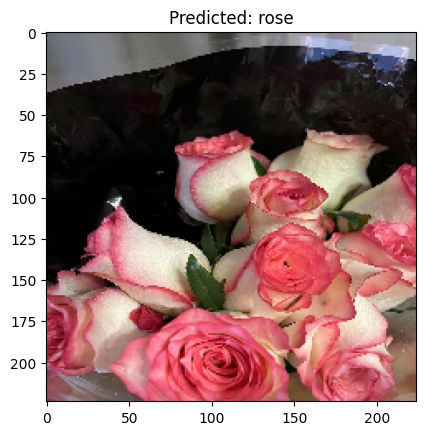

In [186]:
#Step 6 implementation
from tensorflow.keras.preprocessing import image

#Defination basic function
def predict_phone(img_path, model, class_names):

    #Load image
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    #Predict
    prediction = cnn.predict(img_array)[0] 
    predicted_class = np.argmax(prediction)
    


    #Predicted class
    print("Predicted class:", class_names[predicted_class])
    print("\nPrediction probabilities:")

    #Probability for each class
    for i, prob in enumerate(prediction):
        print(f"{class_names[i]}: {prob:.2f}")

    #Visualize
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.show()

class_names = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


img_path_rose = 'rose_phone.jpg'


predict_phone(img_path_rose, cnn, class_names)



**7. Use the same architecture but now train two different models one with L1 or L2 regularization, and one with batch normalization. (10 points)**


* Based on the results of the regularized and batch normalized models, how effective are L1 or L2 regularization and batch normalization techniques? How do they impact the model's performance, convergence, size, and inference time?

* How do the learned weights of the L1 or L2 regularized models compare to the baseline model? Provide any insights on the differences in the learned weights and what it implies for the model's performance and interpretability?

* What insights can be drawn from the comprehensive analysis of the regularized and batch normalized models regarding the use of regularization and normalization techniques in training machine learning models?

Answer:
1. Effectiveness and Impact of L2 Regularization and Batch Normalization:

* I found that L2 regularization accelerated convergence in the early stages but quickly led to performance saturation. In the later stages of training, the validation accuracy stagnated and even declined, eventually dropping to around 55%, significantly lower than the baseline.
* Batch Normalization effectively improved the training speed and training accuracy. However, since the optimal batch size in this experiment was determined to be 16, the small batch size introduced noise in the estimation of mean and variance during Batch Normalization. This resulted in unstable training and a drop in validation accuracy compared to the baseline, weakening the model’s generalization ability.
* Regarding model size and inference time: L2 regularization does not increase model size, as it only adds additional regularization computations during training. In contrast, Batch Normalization increases model size and inference time due to the addition of extra parameters (mean, variance, scale, and shift) and the need to perform normalization during inference.

2. Comparison of Learned Weights between L2 Regularized Model and Baseline Model:
The mean and standard deviation of the weights are as follows:

* Baseline model — Mean: -0.038286, Std: 0.142494
* L2 Regularized model — Mean: -0.000173, Std: 0.014115

* It can be observed that L2 regularization led to smaller and more concentrated weight magnitudes, with a significant reduction in standard deviation. However, since the model in this experiment was already small and the dataset size was moderate, the baseline model achieved a validation accuracy of 77%-80% without any apparent overfitting. Thus, applying L2 regularization unnecessarily restricted the model’s expressiveness, resulting in poorer validation performance as the model failed to capture finer data patterns.

3. Comprehensive Insights on Regularization and Normalization Techniques:

* L2 regularization is effective in controlling model complexity and preventing severe overfitting in large models. However, for smaller models without significant overfitting issues, applying L2 regularization may unnecessarily limit the model’s learning capacity and reduce its generalization performance.
* Batch Normalization is highly effective when using moderate to large batch sizes (such as 32 or 64). However, when using small batch sizes (like 16 in this experiment), the noise in the estimation of statistics can introduce instability during training and negatively impact validation performance.

1. L2正则化和Batch Normalization的有效性及影响：

* 我发现，L2正则化在初期加快了收敛速度，但也导致模型很快达到性能瓶颈，且在训练后期出现了验证集准确率停滞甚至下降的现象，最终验证集准确率降至约55%，明显低于baseline。
* Batch Normalization有效提升了训练速度和训练准确率，但由于本实验中选择的最佳batch size为16，batch size较小，导致Batch Normalization在估计均值和方差时引入噪声，从而造成训练过程不稳定，验证集准确率相比baseline有所下降，模型的泛化能力减弱。
* 在模型大小和推理时间方面：L2正则化不会增加模型大小，仅在训练阶段引入额外的正则项计算；而Batch Normalization会增加额外的参数（如均值、方差、缩放和平移参数），导致模型大小和推理时间有所增加，推理时还需进行归一化计算。

2. L2正则化模型与baseline模型的权重对比：
模型权重均值与标准差如下：

* Baseline模型 — 均值：-0.038286，标准差：0.142494
* L2正则化模型 — 均值：-0.000173，标准差：0.014115

可以看出，L2正则化使模型学习到的权重幅度更小，分布更加集中，权重的标准差显著降低。然而，由于本次实验中模型本身较小，数据集规模适中，在不使用正则化的情况下，验证集准确率已达到77%-80%，不存在明显过拟合。因此，L2正则化反而限制了模型的表达能力，导致模型无法充分学习数据中的细节特征，验证集性能下降。

3.	关于正则化和归一化技术的综合总结：

* L2正则化适用于防止大规模模型出现严重过拟合，但对于本身规模较小且过拟合不明显的模型，过度使用L2正则化反而会降低模型的表达能力和泛化性能。
* Batch Normalization能够在中等到大batch size（如32或64）下显著加速训练、提升稳定性和性能。但在小batch size（如本实验中的16）下，统计估计噪声较大，可能引入扰动，导致训练不稳定并降低模型在验证集上的表现。

Epoch 1/50
189/189 [==============================] - 5s 17ms/step - loss: 1.5926 - accuracy: 0.3143 - val_loss: 1.3322 - val_accuracy: 0.4689
Epoch 2/50
189/189 [==============================] - 3s 16ms/step - loss: 1.4025 - accuracy: 0.4193 - val_loss: 1.1722 - val_accuracy: 0.5295
Epoch 3/50
189/189 [==============================] - 3s 16ms/step - loss: 1.3286 - accuracy: 0.4641 - val_loss: 1.1930 - val_accuracy: 0.5388
Epoch 4/50
189/189 [==============================] - 3s 16ms/step - loss: 1.2790 - accuracy: 0.5035 - val_loss: 1.1541 - val_accuracy: 0.5559
Epoch 5/50
189/189 [==============================] - 3s 16ms/step - loss: 1.2223 - accuracy: 0.5330 - val_loss: 1.1531 - val_accuracy: 0.5497
Epoch 6/50
189/189 [==============================] - 3s 17ms/step - loss: 1.1401 - accuracy: 0.5866 - val_loss: 1.1210 - val_accuracy: 0.6025
Epoch 7/50
189/189 [==============================] - 3s 16ms/step - loss: 1.1058 - accuracy: 0.6058 - val_loss: 1.1859 - val_accuracy: 0.5512

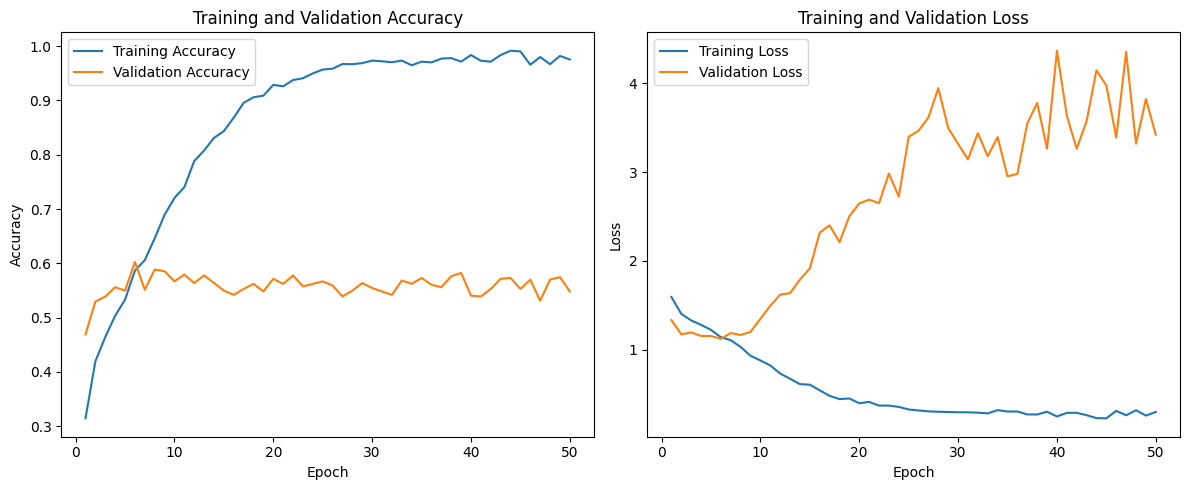

In [ ]:
#Step 7 implementation

#CNN_L2 model
from tensorflow.keras.regularizers import l2

cnn_l2 = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(1e-4)),
    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(1e-4)),
    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dense(5, activation='softmax')
])

cnn_l2.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])

history_l2 = cnn_l2.fit(train_ds_final, epochs=50, validation_data=val_ds_final)

plot_training_history(history_l2, epochs=epochs)

41/41 [==============================] - 0s 6ms/step


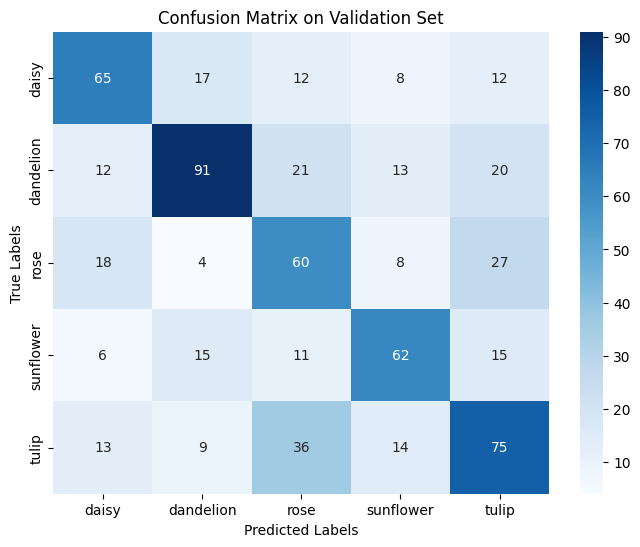

              precision    recall  f1-score   support

       daisy       0.57      0.57      0.57       114
   dandelion       0.67      0.58      0.62       157
        rose       0.43      0.51      0.47       117
   sunflower       0.59      0.57      0.58       109
       tulip       0.50      0.51      0.51       147

    accuracy                           0.55       644
   macro avg       0.55      0.55      0.55       644
weighted avg       0.56      0.55      0.55       644



In [178]:
evaluate_model_on_validation(cnn_l2,val_ds_final)

Epoch 1/50
189/189 [==============================] - 8s 20ms/step - loss: 1.3608 - accuracy: 0.4627 - val_loss: 2.0219 - val_accuracy: 0.2438
Epoch 2/50
189/189 [==============================] - 4s 21ms/step - loss: 1.0757 - accuracy: 0.5773 - val_loss: 1.5412 - val_accuracy: 0.3463
Epoch 3/50
189/189 [==============================] - 4s 21ms/step - loss: 0.9837 - accuracy: 0.6231 - val_loss: 1.5749 - val_accuracy: 0.4674
Epoch 4/50
189/189 [==============================] - 4s 20ms/step - loss: 0.8947 - accuracy: 0.6522 - val_loss: 0.9538 - val_accuracy: 0.6584
Epoch 5/50
189/189 [==============================] - 4s 21ms/step - loss: 0.8232 - accuracy: 0.6900 - val_loss: 1.0115 - val_accuracy: 0.6429
Epoch 6/50
189/189 [==============================] - 4s 21ms/step - loss: 0.7504 - accuracy: 0.7184 - val_loss: 1.0726 - val_accuracy: 0.5901
Epoch 7/50
189/189 [==============================] - 4s 21ms/step - loss: 0.6572 - accuracy: 0.7688 - val_loss: 1.2190 - val_accuracy: 0.6025

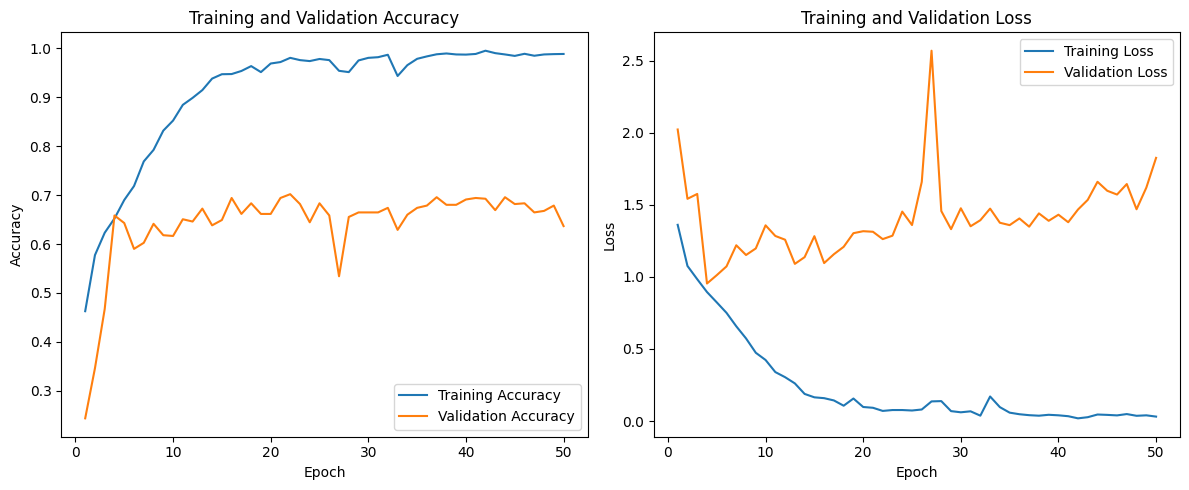

In [160]:
#CNN_BN model
from tensorflow.keras.layers import BatchNormalization

cnn_bn = Sequential([
    Input(shape=(224, 224, 3)),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(5, activation='softmax')
])

cnn_bn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(1e-3), metrics=['accuracy'])

history_bn = cnn_bn.fit(train_ds_final, epochs=50, validation_data=val_ds_final)

plot_training_history(history_bn, epochs=epochs)

41/41 [==============================] - 0s 6ms/step


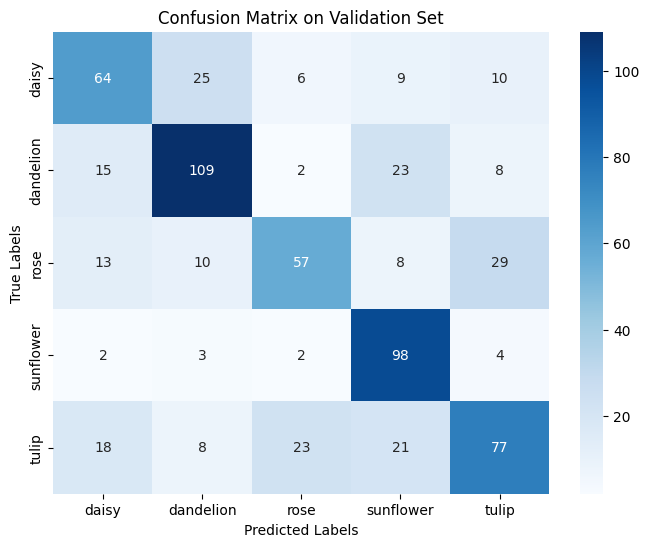

              precision    recall  f1-score   support

       daisy       0.57      0.56      0.57       114
   dandelion       0.70      0.69      0.70       157
        rose       0.63      0.49      0.55       117
   sunflower       0.62      0.90      0.73       109
       tulip       0.60      0.52      0.56       147

    accuracy                           0.63       644
   macro avg       0.63      0.63      0.62       644
weighted avg       0.63      0.63      0.62       644



In [166]:
evaluate_model_on_validation(cnn_bn,val_ds_final)

In [184]:
import numpy as np
import matplotlib.pyplot as plt

def get_all_weights(model):
    all_weights = []
    for layer in model.layers:
        weights = layer.get_weights()
        for w in weights:
            all_weights.append(w.flatten())
    if all_weights:
        return np.concatenate(all_weights)
    else:
        return np.array([])


weights_baseline = get_all_weights(cnn)
weights_l2 = get_all_weights(cnn_l2)

# 打印均值和标准差
print(f"Baseline Model - Mean: {np.mean(weights_baseline):.6f}, Std: {np.std(weights_baseline):.6f}")
print(f"L2 Model - Mean: {np.mean(weights_l2):.6f}, Std: {np.std(weights_l2):.6f}")


Baseline Model - Mean: -0.038286, Std: 0.142494
L2 Model - Mean: -0.000173, Std: 0.014115


**8. Improve the accuracy by trying something extra. (10 points)** 

* By incorporating additional training strategies such as regularization techniques like dropout, data augmentation, and batch or layer normalization, can the accuracy of the model be improved? 

* Modify the given model architecture to improve the accuracy over the baseline? You can modify the model architecture by adding or removing layers, changing the number of filters, or adding skip connections. 


* Use transfer learning to fine-tune an existing pre-trained model to improve accuracy?  What approach will you use for transfer learning: feature extraction or fine-tuning and why?



Answer:
1. In this experiment, since data augmentation had already been applied initially and Batch Normalization was incorporated in the previous step, I only added Dropout (0.25) to the original model. The result showed that the highest validation accuracy was 77.6%, which is slightly lower than the baseline (approximately 80.7%). This suggests that while Dropout is theoretically effective in preventing overfitting, in this case, the baseline model did not suffer from significant overfitting. Therefore, introducing Dropout weakened the model’s expressive capacity and led to a drop in accuracy.

2. I also modified the model by adding an additional convolutional layer within each convolutional block. The validation accuracy achieved was similar to the Dropout case and still slightly below the baseline. This indicates that simply increasing model depth does not bring substantial improvement on small datasets; instead, it may increase the difficulty of training and risk overfitting.

3. I adopted transfer learning by applying feature extraction using a pretrained MobileNetV2 model. Specifically, I froze the convolutional base and did not update its pretrained weights, adding new fully connected layers on top for training. Given that the dataset is relatively small and the image content is similar to the ImageNet dataset on which MobileNetV2 was trained, this approach effectively prevented overfitting and significantly accelerated training. The transfer learning model achieved a highest validation accuracy of 89.8%, notably higher than the baseline. This demonstrates that transfer learning can fully leverage strong features learned from large datasets, achieving superior performance on small datasets, whereas training small models from scratch is more prone to suboptimal convergence.

Answer：
1.	在本次实验中，由于一开始已经进行了数据增强，并且在前面的步骤中已经使用过Batch Normalization，因此本次仅在原模型基础上增加了Dropout（0.25）。实验结果显示，最高验证集准确率为77.6%，略低于baseline（约80.7%）。这表明，虽然Dropout在理论上有助于防止过拟合，但在本例中，baseline模型并未出现明显过拟合，因此引入Dropout反而削弱了模型的表达能力，导致准确率下降。
2.	我在每个卷积模块（block）中额外增加了一层卷积层。结果显示，验证集准确率与使用Dropout的情况相似，仍然略低于baseline。这说明在小型数据集上，简单堆叠更多卷积层并不能带来显著性能提升，反而可能因为模型容量增加，导致学习难度加大。
3.	最后，我采用了迁移学习的方法，具体是通过特征提取（Feature Extraction）的方式使用预训练的MobileNetV2模型。具体做法是冻结卷积主干，不对预训练权重进行更新，仅在顶部添加新的全连接层进行训练。由于本次数据集规模较小，且图像内容与ImageNet数据分布相近，因此迁移学习有效防止了过拟合，并显著加快了训练速度。最终，迁移学习模型在验证集上取得了89.8%**的最高准确率，显著高于baseline。这表明迁移学习可以充分利用大规模数据上学到的强特征，在小数据集上取得更优异的性能，而从头训练的小模型更容易陷入局部最优。

Epoch 1/50


2025-04-27 18:09:35.379508: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_126/dropout_14/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


189/189 [==============================] - 5s 17ms/step - loss: 1.5242 - accuracy: 0.3253 - val_loss: 1.3426 - val_accuracy: 0.4161
Epoch 2/50
189/189 [==============================] - 3s 16ms/step - loss: 1.4628 - accuracy: 0.3624 - val_loss: 1.2797 - val_accuracy: 0.4394
Epoch 3/50
189/189 [==============================] - 4s 18ms/step - loss: 1.3941 - accuracy: 0.3985 - val_loss: 1.2426 - val_accuracy: 0.4472
Epoch 4/50
189/189 [==============================] - 3s 17ms/step - loss: 1.3646 - accuracy: 0.4107 - val_loss: 1.2541 - val_accuracy: 0.4550
Epoch 5/50
189/189 [==============================] - 3s 17ms/step - loss: 1.3575 - accuracy: 0.4121 - val_loss: 1.1684 - val_accuracy: 0.4984
Epoch 6/50
189/189 [==============================] - 3s 17ms/step - loss: 1.3255 - accuracy: 0.4531 - val_loss: 1.1680 - val_accuracy: 0.5264
Epoch 7/50
189/189 [==============================] - 3s 18ms/step - loss: 1.2664 - accuracy: 0.4780 - val_loss: 1.1122 - val_accuracy: 0.5481
Epoch 8/50

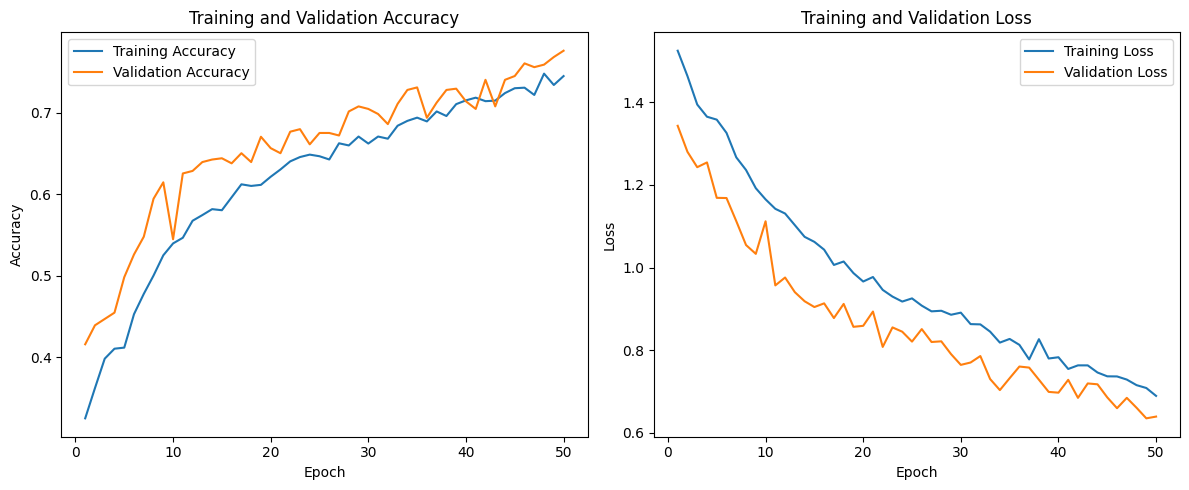

In [202]:
#Step 8 implementation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

cnn_dropout = Sequential([
    Input(shape=(224, 224, 3)),

    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.4),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

cnn_dropout.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=1e-3),
    metrics=['accuracy']
)

history_dropout = cnn_dropout.fit(train_ds_final, epochs=50, validation_data=val_ds_final)

plot_training_history(history_dropout, epochs=50)

Epoch 1/50
189/189 [==============================] - 6s 19ms/step - loss: 1.5330 - accuracy: 0.3203 - val_loss: 1.3594 - val_accuracy: 0.3758
Epoch 2/50
189/189 [==============================] - 4s 19ms/step - loss: 1.4543 - accuracy: 0.3614 - val_loss: 1.3097 - val_accuracy: 0.4068
Epoch 3/50
189/189 [==============================] - 4s 20ms/step - loss: 1.4343 - accuracy: 0.3740 - val_loss: 1.3159 - val_accuracy: 0.4006
Epoch 4/50
189/189 [==============================] - 4s 19ms/step - loss: 1.4139 - accuracy: 0.3852 - val_loss: 1.3386 - val_accuracy: 0.4006
Epoch 5/50
189/189 [==============================] - 4s 20ms/step - loss: 1.3922 - accuracy: 0.3968 - val_loss: 1.3177 - val_accuracy: 0.4115
Epoch 6/50
189/189 [==============================] - 4s 19ms/step - loss: 1.3715 - accuracy: 0.4134 - val_loss: 1.2848 - val_accuracy: 0.4565
Epoch 7/50
189/189 [==============================] - 4s 19ms/step - loss: 1.3530 - accuracy: 0.4233 - val_loss: 1.2574 - val_accuracy: 0.4581

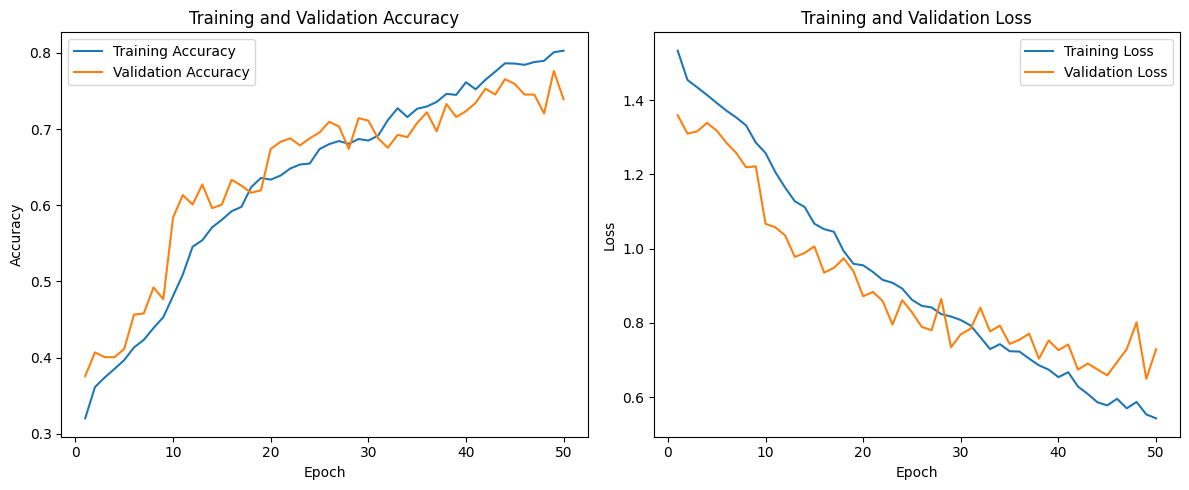

In [204]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

# Define improved CNN model
cnn_new = Sequential([
    Input(shape=(224, 224, 3)),

    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dense(5, activation='softmax')
])

# Compile the model
cnn_new.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history_new = cnn_new.fit(
    train_ds_final, 
    validation_data=val_ds_final, 
    epochs=50,
    verbose=1
)

plot_training_history(history_new, epochs=50)

In [201]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# Load pretrained MobileNetV2
base_model = MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

# Freeze base model
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(5, activation='softmax')(x)

model_transfer = Model(inputs=base_model.input, outputs=predictions)

model_transfer.compile(
    optimizer=Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_transfer = model_transfer.fit(train_ds_final, epochs=50, validation_data=val_ds_final)



Epoch 1/50
189/189 [==============================] - 6s 19ms/step - loss: 1.0290 - accuracy: 0.6197 - val_loss: 0.5487 - val_accuracy: 0.7997
Epoch 2/50
189/189 [==============================] - 3s 15ms/step - loss: 0.6592 - accuracy: 0.7486 - val_loss: 0.4442 - val_accuracy: 0.8416
Epoch 3/50
189/189 [==============================] - 3s 15ms/step - loss: 0.5979 - accuracy: 0.7761 - val_loss: 0.4318 - val_accuracy: 0.8509
Epoch 4/50
189/189 [==============================] - 3s 17ms/step - loss: 0.5580 - accuracy: 0.7864 - val_loss: 0.4049 - val_accuracy: 0.8525
Epoch 5/50
189/189 [==============================] - 3s 16ms/step - loss: 0.4932 - accuracy: 0.8135 - val_loss: 0.4148 - val_accuracy: 0.8494
Epoch 6/50
189/189 [==============================] - 3s 15ms/step - loss: 0.4845 - accuracy: 0.8201 - val_loss: 0.3915 - val_accuracy: 0.8571
Epoch 7/50
189/189 [==============================] - 3s 15ms/step - loss: 0.4841 - accuracy: 0.8152 - val_loss: 0.3919 - val_accuracy: 0.8494

# Section 2: Transformers

**Objective:** The objective of this section is to implement transformer by given description. Training is NOT required. 

**Tasks:**
To complete this assignment, please submit a single notebook that includes the implementation and outputs of the following steps. Please ensure that the notebook retain the outputs. Failure to do so will result in zero marks for the corresponding steps in which no output is displayed.

**1. Implement the given Transformer architecture (Self-Attention Blocks and FeedForward Networks only). Training is not needed. (20 points)**
*  In Self-Attention Blocks, there are 12 attention heads and 64 head dimension. In FeedForward Networks, the hidden dimensions are 4 times of input dimensions.
*  The input token shape is [batch, num_tokens, dim]
*  Use pre layer normalization in each block
*  Use GeLU activation function in the FeedForward Networks


In [206]:
#Step 1 implementation
import torch
import torch.nn as nn
import torch.nn.functional as F

class MultiHeadSelfAttention(nn.Module):
    def __init__(self, dim, num_heads=12, head_dim=64):
        super().__init__()
        self.num_heads = num_heads
        self.head_dim = head_dim
        self.inner_dim = num_heads * head_dim
        
        self.qkv_proj = nn.Linear(dim, self.inner_dim * 3)
        self.out_proj = nn.Linear(self.inner_dim, dim)
    
    def forward(self, x):
        batch_size, num_tokens, dim = x.shape
        qkv = self.qkv_proj(x)  # (batch_size, num_tokens, inner_dim * 3)
        qkv = qkv.reshape(batch_size, num_tokens, 3, self.num_heads, self.head_dim)
        q, k, v = qkv.unbind(dim=2)
        
        attn_scores = (q @ k.transpose(-2, -1)) / (self.head_dim ** 0.5)
        attn_probs = attn_scores.softmax(dim=-1)
        attn_output = attn_probs @ v
        
        attn_output = attn_output.reshape(batch_size, num_tokens, self.inner_dim)
        return self.out_proj(attn_output)

class FeedForward(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.fc1 = nn.Linear(dim, dim * 4)
        self.fc2 = nn.Linear(dim * 4, dim)
        self.activation = nn.GELU()
    
    def forward(self, x):
        return self.fc2(self.activation(self.fc1(x)))

class TransformerBlock(nn.Module):
    def __init__(self, dim, num_heads=12, head_dim=64):
        super().__init__()
        self.ln1 = nn.LayerNorm(dim)
        self.attention = MultiHeadSelfAttention(dim, num_heads, head_dim)
        self.ln2 = nn.LayerNorm(dim)
        self.feedforward = FeedForward(dim)
    
    def forward(self, x):
        x = x + self.attention(self.ln1(x))  
        x = x + self.feedforward(self.ln2(x)) 
        return x

#Test
test_input = torch.randn(2, 16, 768) 
model = TransformerBlock(dim=768)
output = model(test_input)
print(output.shape) 

torch.Size([2, 16, 768])


**2. Visualize your architecture. (10 points)**
* Draw the architecture diagram of the Transformer and save as "transformer.png".

> Step 2 Visualization
>
> <img src='transformer.png' alt='student transformer'>